# Entregable Etapa 3

* Leonardo Laureles A01659241
* Carlos Mateos A01654085
* Mariana Rincón A01654973
* Juan Cantú A01284053
* Daniel Núñez A01654137

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos el dataframe

In [2]:
df = pd.read_excel('proyecto.xlsx')

### Revisamos las primeras filas del dataframe

In [3]:
df.head()

Material Entrada    Material Salida     Cliente  Peso Teorico  \
0  MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30         26209   
1  MatEnt_00002MAC00  MatSal_00002PDT00  Cliente 27         25500   
2  MatEnt_00003MAC00  MatSal_00003PDT00  Cliente 11         26079   
3  MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16         23889   
4  MatEnt_00005MAC00  MatSal_00005PDT00  Cliente 25         23360   

   Peso Báscula   Peso  Peso Báscula Entrada  Peso Mínimo  Peso Máximo  \
0         26130  26130               26530.0        10000        30000   
1         25610  25610                   0.0        10000        30000   
2         26010  26010               26540.0        10000        30000   
3         23910  23910               24530.0        10000        30000   
4         23310  23310                   0.0        10000        30000   

   Descarte Est. Prep.  ...  Temp5  Temp6 Temp7 Temp8  Temp9  Temp10  Temp11  \
0                  NaN  ...    804    802   623   622    621     660     660   
1                  NaN  ...    799    781   766   760    753     649     645   
2                  NaN  ...    771    768   620   616    613     658     653   
3                  NaN  ...    803    798   767   764    763     651     649   
4                  NaN  ...    804    798   795   793    791     673     670   

   Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
0     659         0.816250             RECUB02  
1     642         0.802000             RECUB01  
2     650         0.816563             RECUB01  
3     649         0.827000             RECUB02  
4     667         0.776000             RECUB02  

[5 rows x 375 columns]

## 1) Comprensión de los datos del negocio

### a) Dimensión del dataset

In [4]:
df.shape

(23722, 375)

In [5]:
df.size

8895750

### b) Nombre y tipo de dato por columna

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23722 entries, 0 to 23721
Data columns (total 375 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    Material Entrada                     object 
 1    Material Salida                      object 
 2    Cliente                              object 
 3    Peso Teorico                         int64  
 4    Peso Báscula                         int64  
 5    Peso                                 int64  
 6    Peso Báscula Entrada                 float64
 7    Peso Mínimo                          int64  
 8    Peso Máximo                          int64  
 9    Descarte Est. Prep.                  float64
 10   Despunte Entrada                     float64
 11   Descole Entrada                      float64
 12   Norma                                object 
 13   Grado                                object 
 14   Subnorma                             float64
 15   Forma Final      

### b) Cantidad de valores nulos por columna

In [7]:
df.isna().sum()

Material Entrada      0
Material Salida       0
Cliente               0
Peso Teorico          0
Peso Báscula          0
                     ..
Temp10                0
Temp11                0
Temp12                0
PCTJE_REDUCCION       0
TIPO_RECUBRIMIENTO    0
Length: 375, dtype: int64

### b) Posibles valores que hay en la columna

In [8]:
df.apply(pd.value_counts)

Material Entrada  Material Salida  Cliente  Peso Teorico  \
-8830.0               NaN              NaN      NaN           NaN   
-4190.0               NaN              NaN      NaN           NaN   
-4080.0               NaN              NaN      NaN           NaN   
-3960.0               NaN              NaN      NaN           NaN   
-3880.0               NaN              NaN      NaN           NaN   
...                   ...              ...      ...           ...   
Z 140                 NaN              NaN      NaN           NaN   
Z100                  NaN              NaN      NaN           NaN   
Z18                   NaN              NaN      NaN           NaN   
Z27                   NaN              NaN      NaN           NaN   
Z275                  NaN              NaN      NaN           NaN   

         Peso Báscula  Peso  Peso Báscula Entrada  Peso Mínimo  Peso Máximo  \
-8830.0           NaN   NaN                   NaN          NaN          NaN   
-4190.0           NaN   NaN                   NaN          NaN          NaN   
-4080.0           NaN   NaN                   NaN          NaN          NaN   
-3960.0           NaN   NaN                   NaN          NaN          NaN   
-3880.0           NaN   NaN                   NaN          NaN          NaN   
...               ...   ...                   ...          ...          ...   
Z 140             NaN   NaN                   NaN          NaN          NaN   
Z100              NaN   NaN                   NaN          NaN          NaN   
Z18               NaN   NaN                   NaN          NaN          NaN   
Z27               NaN   NaN                   NaN          NaN          NaN   
Z275              NaN   NaN                   NaN          NaN          NaN   

         Descarte Est. Prep.  ...  Temp5  Temp6  Temp7  Temp8  Temp9  Temp10  \
-8830.0                  NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
-4190.0                  NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
-4080.0                  NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
-3960.0                  NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
-3880.0                  NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
...                      ...  ...    ...    ...    ...    ...    ...     ...   
Z 140                    NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
Z100                     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
Z18                      NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
Z27                      NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   
Z275                     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN   

         Temp11  Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
-8830.0     NaN     NaN              NaN                 NaN  
-4190.0     NaN     NaN              NaN                 NaN  
-4080.0     NaN     NaN              NaN                 NaN  
-3960.0     NaN     NaN              NaN                 NaN  
-3880.0     NaN     NaN              NaN                 NaN  
...         ...     ...              ...                 ...  
Z 140       NaN     NaN              NaN                 NaN  
Z100        NaN     NaN              NaN                 NaN  
Z18         NaN     NaN              NaN                 NaN  
Z27         NaN     NaN              NaN                 NaN  
Z275        NaN     NaN              NaN                 NaN  

[138533 rows x 375 columns]

## c) Exploración de datos

### 1) Medidas estadísticas

#### Variables cuantitativas

##### Promedio, mediana, máximo, mínimo y desviación estándar

In [9]:
df.describe()

Peso Teorico  Peso Báscula          Peso  Peso Báscula Entrada  \
count  23722.000000  23722.000000  23722.000000          23719.000000   
mean   23683.633842  23761.047129  23776.155889          12637.289515   
std     3215.394066   3226.431778   3166.548831          12363.235631   
min        0.000000      0.000000    132.000000              0.000000   
25%    22479.000000  22550.000000  22560.000000              0.000000   
50%    25170.000000  25230.000000  25230.000000          16810.000000   
75%    25889.000000  25980.000000  25980.000000          25840.000000   
max    27639.000000  27790.000000  26740.000000          27010.000000   

        Peso Mínimo   Peso Máximo  Descarte Est. Prep.  Despunte Entrada  \
count  23722.000000  23722.000000          6476.000000      23292.000000   
mean   10707.916702  28517.566436           618.083539       4830.825348   
std     1735.175738   2882.198350           598.483793       1675.853056   
min    10000.000000  18000.000000             1.000000      -8830.000000   
25%    10000.000000  28806.000000           367.000000       3550.000000   
50%    10000.000000  30000.000000           447.000000       4770.000000   
75%    10900.000000  30000.000000           709.000000       5960.000000   
max    30000.000000  30000.000000          7869.000000      32767.000000   

       Descole Entrada  Subnorma  ...         Temp4         Temp5  \
count     23296.000000       0.0  ...  23722.000000  23722.000000   
mean       3539.118776       NaN  ...    793.844575    789.996881   
std        1362.442006       NaN  ...     19.251689     19.191014   
min        -515.000000       NaN  ...    713.000000    538.000000   
25%        3229.000000       NaN  ...    781.000000    779.000000   
50%        3272.000000       NaN  ...    791.000000    788.000000   
75%        3675.000000       NaN  ...    806.000000    802.000000   
max       32767.000000       NaN  ...    851.000000    844.000000   

              Temp6         Temp7         Temp8         Temp9        Temp10  \
count  23722.000000  23722.000000  23722.000000  23722.000000  23722.000000   
mean     785.990979    716.159641    712.438369    709.019138    651.163603   
std       21.105232     56.504107     56.909581     57.860521     27.184034   
min      504.000000    400.000000    400.000000    400.000000    400.000000   
25%      776.000000    695.000000    688.000000    682.000000    650.000000   
50%      781.000000    720.000000    717.000000    714.000000    653.000000   
75%      799.000000    756.000000    753.000000    750.000000    671.000000   
max      839.000000    898.000000    851.000000    850.000000    700.000000   

             Temp11       Temp12  PCTJE_REDUCCION  
count  23722.000000  23722.00000     23722.000000  
mean     646.633505    641.07335         1.742938  
std       28.278061     32.17637         1.385215  
min      400.000000    400.00000         0.283438  
25%      645.000000    634.00000         0.777778  
50%      650.000000    649.00000         0.825429  
75%      669.000000    665.00000         3.290000  
max      691.000000    681.00000         6.270000  

[8 rows x 317 columns]

##### Varianza

In [10]:
df.var()

C:\Users\danie\AppData\Local\Temp/ipykernel_24752/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Peso Teorico            1.033876e+07
Peso Báscula            1.040986e+07
Peso                    1.002703e+07
Peso Báscula Entrada    1.528496e+08
Peso Mínimo             3.010835e+06
                            ...     
Temp9                   3.347840e+03
Temp10                  7.389717e+02
Temp11                  7.996487e+02
Temp12                  1.035319e+03
PCTJE_REDUCCION         1.918821e+00
Length: 317, dtype: float64

##### Moda

In [11]:
df.mode(numeric_only=True)

Peso Teorico  Peso Báscula   Peso  Peso Báscula Entrada  Peso Mínimo  \
0         25440         26210  26210                   0.0        10000   

   Peso Máximo  Descarte Est. Prep.  Despunte Entrada  Descole Entrada  \
0        30000                404.0            3330.0           3278.0   

   Subnorma  ...  Temp4  Temp5  Temp6  Temp7  Temp8  Temp9  Temp10  Temp11  \
0       NaN  ...    782    780    779    713    711    710     651     650   

   Temp12  PCTJE_REDUCCION  
0     649             3.32  

[1 rows x 317 columns]

#### Variables cualitativas

In [12]:
df1 = df.copy()
df1 = df1.select_dtypes(include=object, exclude=int and float)

##### Tabla de distribución de frecuencia

In [13]:
df1.apply(pd.value_counts)

Material Entrada  Material Salida  Cliente  Norma  Grado  \
100_00023                     NaN              NaN      NaN    NaN   18.0   
100_00040                     NaN              NaN      NaN    NaN   45.0   
63101-T7AA-A000               NaN              NaN      NaN    NaN    NaN   
66712-H8000                   NaN              NaN      NaN    NaN    NaN   
760224JJL0                    NaN              NaN      NaN    NaN    NaN   
...                           ...              ...      ...    ...    ...   
TRATAMIENTO L                 NaN              NaN      NaN    NaN    NaN   
PASIVADO                      NaN              NaN      NaN    NaN    NaN   
AUTOMOTRIZ                    NaN              NaN      NaN    NaN    NaN   
RECUB01                       NaN              NaN      NaN    NaN    NaN   
RECUB02                       NaN              NaN      NaN    NaN    NaN   

                 Código Acabado  Número Parte  Dictamen  Resolución  PRAM  \
100_00023                   NaN           NaN       NaN         NaN   NaN   
100_00040                   NaN           NaN       NaN         NaN   NaN   
63101-T7AA-A000             NaN          37.0       NaN         NaN   NaN   
66712-H8000                 NaN           3.0       NaN         NaN   NaN   
760224JJL0                  NaN          16.0       NaN         NaN   NaN   
...                         ...           ...       ...         ...   ...   
TRATAMIENTO L               NaN           NaN       NaN         NaN   NaN   
PASIVADO                    NaN           NaN       NaN         NaN   NaN   
AUTOMOTRIZ                  NaN           NaN       NaN         NaN   NaN   
RECUB01                     NaN           NaN       NaN         NaN   NaN   
RECUB02                     NaN           NaN       NaN         NaN   NaN   

                 ...  NOR_TOL_ANCHO'   'PLANITUD'.1  'RECUBRIMIENTO'.1  \
100_00023        ...              NaN           NaN                NaN   
100_00040        ...              NaN           NaN                NaN   
63101-T7AA-A000  ...              NaN           NaN                NaN   
66712-H8000      ...              NaN           NaN                NaN   
760224JJL0       ...              NaN           NaN                NaN   
...              ...              ...           ...                ...   
TRATAMIENTO L    ...              NaN           NaN                NaN   
PASIVADO         ...              NaN           NaN                NaN   
AUTOMOTRIZ       ...              NaN           NaN                NaN   
RECUB01          ...              NaN           NaN                NaN   
RECUB02          ...              NaN           NaN                NaN   

                 'SELLO'.1  'SOLDA'.1  'SUPERFICIE'.1  'TAM_FLOR'.1  \
100_00023              NaN        NaN             NaN           NaN   
100_00040              NaN        NaN             NaN           NaN   
63101-T7AA-A000        NaN        NaN             NaN           NaN   
66712-H8000            NaN        NaN             NaN           NaN   
760224JJL0             NaN        NaN             NaN           NaN   
...                    ...        ...             ...           ...   
TRATAMIENTO L          NaN        NaN             NaN           NaN   
PASIVADO               NaN        NaN             NaN           NaN   
AUTOMOTRIZ             NaN        NaN             NaN           NaN   
RECUB01                NaN        NaN             NaN           NaN   
RECUB02                NaN        NaN             NaN           NaN   

                 'TRAT_SUPERF'.1  'USO_GRAL'.1  TIPO_RECUBRIMIENTO  
100_00023                    NaN           NaN                 NaN  
100_00040                    NaN           NaN                 NaN  
63101-T7AA-A000              NaN           NaN                 NaN  
66712-H8000                  NaN           NaN                 NaN  
760224JJL0                   NaN           NaN                 NaN  
...        

##### Moda

In [14]:
df1.mode(numeric_only=False)

Material Entrada    Material Salida     Cliente    Norma      Grado  \
0      MatEnt_00409MAC00  MatSal_00001PDT00  Cliente 11  Norma 1  TNG_00027   
1      MatEnt_00541MAC00  MatSal_00002PDT00         NaN      NaN        NaN   
2      MatEnt_00730MAC00  MatSal_00003PDT00         NaN      NaN        NaN   
3      MatEnt_00912MAC00  MatSal_00004PDT00         NaN      NaN        NaN   
4      MatEnt_01714MAC00  MatSal_00005PDT00         NaN      NaN        NaN   
...                  ...                ...         ...      ...        ...   
23717                NaN  MatSal_23718PDT00         NaN      NaN        NaN   
23718                NaN  MatSal_23719PDT00         NaN      NaN        NaN   
23719                NaN  MatSal_23720PDT00         NaN      NaN        NaN   
23720                NaN  MatSal_23721PDT00         NaN      NaN        NaN   
23721                NaN  MatSal_23722PDT00         NaN      NaN        NaN   

      Código Acabado     Número Parte  Dictamen   Resolución            PRAM  \
0               MATE  63101-T7AA-A000  ACEPTADO  SOBRE ORDEN  Pram_0000270A0   
1                NaN              NaN       NaN          NaN  Pram_0000770A0   
2                NaN              NaN       NaN          NaN  Pram_0001175A0   
3                NaN              NaN       NaN          NaN  Pram_0001365A0   
4                NaN              NaN       NaN          NaN  Pram_0001960A0   
...              ...              ...       ...          ...             ...   
23717            NaN              NaN       NaN          NaN             NaN   
23718            NaN              NaN       NaN          NaN             NaN   
23719            NaN              NaN       NaN          NaN             NaN   
23720            NaN              NaN       NaN          NaN             NaN   
23721            NaN              NaN       NaN          NaN             NaN   

       ... NOR_TOL_ANCHO'             'PLANITUD'.1 'RECUBRIMIENTO'.1  \
0      ...       NOR_TOL07  NIVEL 6 / 100 UI / 8MM                 0   
1      ...             NaN                     NaN               NaN   
2      ...             NaN                     NaN               NaN   
3      ...             NaN                     NaN               NaN   
4      ...             NaN                     NaN               NaN   
...    ...             ...                     ...               ...   
23717  ...             NaN                     NaN               NaN   
23718  ...             NaN                     NaN               NaN   
23719  ...             NaN                     NaN               NaN   
23720  ...             NaN                     NaN               NaN   
23721  ...             NaN                     NaN               NaN   

      'SELLO'.1 'SOLDA'.1 'SUPERFICIE'.1 'TAM_FLOR'.1  'TRAT_SUPERF'.1  \
0            NO         0    NO EXPUESTA            0  SIN TRATAMIENTO   
1           NaN       NaN            NaN          NaN              NaN   
2           NaN       NaN            NaN          NaN              NaN   
3           NaN       NaN            NaN          NaN              NaN   
4           NaN       NaN            NaN          NaN              NaN   
...         ...       ...            ...          ...              ...   
23717       NaN       NaN            NaN          NaN              NaN   
23718       NaN       NaN            NaN          NaN              NaN   
23719       NaN       NaN            NaN          NaN              NaN   
23720       NaN       NaN            NaN          NaN              NaN   
23721       NaN       NaN            NaN          NaN              NaN   

      'USO_GRAL'.1 TIPO_RECUBRIMIENTO  
0       AUTOMOTRIZ            RECUB01  
1              NaN                NaN  
2              NaN                NaN  
3              NaN                NaN  
4              NaN                NaN  
...            ...                ...  
23717          NaN                NaN  
23718          NaN      

In [15]:
df1.describe(include=object)

Material Entrada    Material Salida     Cliente    Norma      Grado  \
count               23722              23722       23722    23722      23722   
unique              23689              23722          33        2         51   
top     MatEnt_09340MAC00  MatSal_00001PDT00  Cliente 11  Norma 1  TNG_00027   
freq                    2                  1       10626    23561       4084   

       Código Acabado     Número Parte  Dictamen   Resolución            PRAM  \
count           23722               74     14942        23722           23722   
unique              3                4         2            4           20177   
top              MATE  63101-T7AA-A000  ACEPTADO  SOBRE ORDEN  Pram_1727370A0   
freq            17743               37      9633        15207               2   

        ... NOR_TOL_ANCHO'             'PLANITUD'.1 'RECUBRIMIENTO'.1  \
count   ...           23722                   23722             23722   
unique  ...              18                       6                38   
top     ...       NOR_TOL07  NIVEL 6 / 100 UI / 8MM                 0   
freq    ...            8777                    9295              8780   

       'SELLO'.1 'SOLDA'.1 'SUPERFICIE'.1 'TAM_FLOR'.1  'TRAT_SUPERF'.1  \
count      23722     23722          23722        23722            23722   
unique         2         2              6            3                4   
top           NO         0    NO EXPUESTA            0  SIN TRATAMIENTO   
freq       14942     14945           8778        15472            13316   

       'USO_GRAL'.1 TIPO_RECUBRIMIENTO  
count         23722              23722  
unique            3                  2  
top      AUTOMOTRIZ            RECUB01  
freq          14942              12655  

[4 rows x 58 columns]

## 2) Preparación de los datos

### 1- Selección del conjunto de datos a utilizar

#### a) Conjunto de datos a utilizar y por qué

##### Utilizaremos los datos en donde no tengamos repeticiones en las columnas, por ejemplo, existen 4 columnas con el "Peso" pero sólo una fue reelevante, analizando a fondo la base de datos, vimos que hay varias cosas similares, más adelante limpiaremos esto. También hay columnas que sirven de guías para simplificar la información, pero luego de utilizarlas, se vuelven columnas innecesarias, así mismo, tomaremos en cuenta la información del socio formador sobre los defectos relevantes y no relevantes.

#### b) Columna objetivo

##### Nos enfocaremos en la columna de los defectos, ya que se busca reducir la cantidad de los defectos más relevantes

### 2- Limpieza de datos

In [16]:
df.select_dtypes(include=int and float, exclude=object)


Peso Báscula Entrada  Descarte Est. Prep.  Despunte Entrada  \
0                   26530.0                  NaN            6710.0   
1                       0.0                  NaN            5810.0   
2                   26540.0                  NaN            5960.0   
3                   24530.0                  NaN            5960.0   
4                       0.0                  NaN            3760.0   
...                     ...                  ...               ...   
23717               23590.0                  NaN            6480.0   
23718               23700.0                  NaN            4690.0   
23719               25650.0               1068.0            4640.0   
23720               25360.0               1070.0            6350.0   
23721                   0.0                450.0            6590.0   

       Descole Entrada  Subnorma  Forma Final  Ancho Salida  Ancho Mínimo  \
0               3279.0       NaN          NaN        1370.0        1360.0   
1               4841.0       NaN          NaN        1455.0        1440.0   
2               4853.0       NaN          NaN        1500.0        1480.0   
3               4865.0       NaN          NaN        1580.0        1564.0   
4               3274.0       NaN          NaN        1658.0        1646.0   
...                ...       ...          ...           ...           ...   
23717           3275.0       NaN          NaN        1448.0        1440.0   
23718           3264.0       NaN          NaN        1454.0        1440.0   
23719           3265.0       NaN          NaN        1452.0        1440.0   
23720           3277.0       NaN          NaN        1453.0        1440.0   
23721           3272.0       NaN          NaN        1454.0        1440.0   

       Ancho Máximo  Espesor Salida  ...  Elemento 42  Elemento 43  \
0            1385.0           0.588  ...         0.01         1.43   
1            1465.0           0.792  ...         0.00         0.00   
2            1505.0           0.587  ...         0.01         1.43   
3            1589.0           0.692  ...         0.01         2.00   
4            1671.0           0.784  ...         0.01         1.11   
...             ...             ...  ...          ...          ...   
23717        1465.0           0.889  ...         0.01         0.83   
23718        1465.0           0.889  ...         0.01         0.83   
23719        1465.0           0.889  ...         0.01         0.83   
23720        1465.0           0.890  ...         0.01         0.83   
23721        1465.0           0.889  ...         0.00         0.00   

       Elemento 44  Elemento 45  Elemento 46   Ancho  Espesor  PesoMIN  \
0              0.0         0.02          0.0  1340.0    0.616      5.0   
1              0.0         0.05          0.0  1420.0    0.800      7.0   
2              0.0         0.05          0.0  1460.0    0.600     10.0   
3              0.0         0.03          0.0  1544.0    0.700      7.0   
4              0.0         0.02          0.0  1626.0    0.816      7.0   
...            ...          ...          ...     ...      ...      ...   
23717          0.0         0.06          0.0  1420.0    0.900      6.0   
23718          0.0         0.06          0.0  1420.0    0.900      6.0   
23719          0.0         0.06          0.0  1420.0    0.900      6.0   
23720          0.0         0.06          0.0  1420.0    0.900      6.0   
23721          0.0         0.05          0.0  1420.0    0.900      6.0   

       PesoMax  PCTJE_REDUCCION  
0         18.0         0.816250  
1         18.0         0.802000  
2         24.0         0.816563  
3         15.0         0.827000  
4         15.0         0.776000  
...        ...              ...  
23717     25.0         0.802444  
23718     25.0         0.802444  
23719     25.0         0.802444  
23720     25.0         0.802222  
23721     25.0         0.802444  

[23722 rows x 74 columns]

#### a) Eliminación de duplicados

In [17]:
df.drop_duplicates()

Material Entrada    Material Salida     Cliente  Peso Teorico  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30         26209   
1      MatEnt_00002MAC00  MatSal_00002PDT00  Cliente 27         25500   
2      MatEnt_00003MAC00  MatSal_00003PDT00  Cliente 11         26079   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16         23889   
4      MatEnt_00005MAC00  MatSal_00005PDT00  Cliente 25         23360   
...                  ...                ...         ...           ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11         23010   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11         23010   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11         24809   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11         24750   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11         24659   

       Peso Báscula   Peso  Peso Báscula Entrada  Peso Mínimo  Peso Máximo  \
0             26130  26130               26530.0        10000        30000   
1             25610  25610                   0.0        10000        30000   
2             26010  26010               26540.0        10000        30000   
3             23910  23910               24530.0        10000        30000   
4             23310  23310                   0.0        10000        30000   
...             ...    ...                   ...          ...          ...   
23717         23120  23120               23590.0        10000        30000   
23718         23280  23280               23700.0        10000        30000   
23719         25020  25020               25650.0        10000        30000   
23720         24880  24880               25360.0        10000        30000   
23721         24810  24810                   0.0        10000        30000   

       Descarte Est. Prep.  ...  Temp5  Temp6 Temp7 Temp8  Temp9  Temp10  \
0                      NaN  ...    804    802   623   622    621     660   
1                      NaN  ...    799    781   766   760    753     649   
2                      NaN  ...    771    768   620   616    613     658   
3                      NaN  ...    803    798   767   764    763     651   
4                      NaN  ...    804    798   795   793    791     673   
...                    ...  ...    ...    ...   ...   ...    ...     ...   
23717                  NaN  ...    777    776   710   708    706     652   
23718                  NaN  ...    780    779   710   709    707     652   
23719               1068.0  ...    780    780   715   710    708     653   
23720               1070.0  ...    780    779   713   711    709     651   
23721                450.0  ...    780    779   713   711    710     651   

       Temp11  Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
0         660     659         0.816250             RECUB02  
1         645     642         0.802000             RECUB01  
2         653     650         0.816563             RECUB01  
3         649     649         0.827000             RECUB02  
4         670     667         0.776000             RECUB02  
...       ...     ...              ...                 ...  
23717     650     647         0.802444             RECUB01  
23718     650     650         0.802444             RECUB01  
23719     650     649         0.802444             RECUB01  
23720     650     649         0.802222             RECUB01  
23721     650     649         0.802444             RECUB01  

[23722 rows x 375 columns]

#### b) Corrección de valores erróneos (no mencionados)

#### c) Manejo de valores faltantes o no relevantes, y verificación de la calidad de los datos

##### Quitamos los datos donde solo hubiera una opción en la columna

In [18]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df3 = df.copy()
df3 = df3.drop(cols_to_drop, axis=1)
df3

Material Entrada    Material Salida     Cliente  Peso Teorico  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30         26209   
1      MatEnt_00002MAC00  MatSal_00002PDT00  Cliente 27         25500   
2      MatEnt_00003MAC00  MatSal_00003PDT00  Cliente 11         26079   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16         23889   
4      MatEnt_00005MAC00  MatSal_00005PDT00  Cliente 25         23360   
...                  ...                ...         ...           ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11         23010   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11         23010   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11         24809   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11         24750   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11         24659   

       Peso Báscula   Peso  Peso Báscula Entrada  Peso Mínimo  Peso Máximo  \
0             26130  26130               26530.0        10000        30000   
1             25610  25610                   0.0        10000        30000   
2             26010  26010               26540.0        10000        30000   
3             23910  23910               24530.0        10000        30000   
4             23310  23310                   0.0        10000        30000   
...             ...    ...                   ...          ...          ...   
23717         23120  23120               23590.0        10000        30000   
23718         23280  23280               23700.0        10000        30000   
23719         25020  25020               25650.0        10000        30000   
23720         24880  24880               25360.0        10000        30000   
23721         24810  24810                   0.0        10000        30000   

       Descarte Est. Prep.  ...  Temp5  Temp6 Temp7 Temp8  Temp9  Temp10  \
0                      NaN  ...    804    802   623   622    621     660   
1                      NaN  ...    799    781   766   760    753     649   
2                      NaN  ...    771    768   620   616    613     658   
3                      NaN  ...    803    798   767   764    763     651   
4                      NaN  ...    804    798   795   793    791     673   
...                    ...  ...    ...    ...   ...   ...    ...     ...   
23717                  NaN  ...    777    776   710   708    706     652   
23718                  NaN  ...    780    779   710   709    707     652   
23719               1068.0  ...    780    780   715   710    708     653   
23720               1070.0  ...    780    779   713   711    709     651   
23721                450.0  ...    780    779   713   711    710     651   

       Temp11  Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
0         660     659         0.816250             RECUB02  
1         645     642         0.802000             RECUB01  
2         653     650         0.816563             RECUB01  
3         649     649         0.827000             RECUB02  
4         670     667         0.776000             RECUB02  
...       ...     ...              ...                 ...  
23717     650     647         0.802444             RECUB01  
23718     650     650         0.802444             RECUB01  
23719     650     649         0.802444             RECUB01  
23720     650     649         0.802222             RECUB01  
23721     650     649         0.802444             RECUB01  

[23722 rows x 147 columns]

##### Quitamos las columnas con el 49% de valores nulos

In [19]:
round(len(df3.index) * 0.51)

12098

In [20]:
df3 = df3.dropna(axis=1, thresh = 12098)

In [21]:
df3.describe(include=object)

Material Entrada    Material Salida     Cliente    Norma      Grado  \
count               23722              23722       23722    23722      23722   
unique              23689              23722          33        2         51   
top     MatEnt_09340MAC00  MatSal_00001PDT00  Cliente 11  Norma 1  TNG_00027   
freq                    2                  1       10626    23561       4084   

       Código Acabado  Dictamen   Resolución            PRAM  \
count           23722     14942        23722           23722   
unique              3         2            4           20177   
top              MATE  ACEPTADO  SOBRE ORDEN  Pram_1727370A0   
freq            17743      9633        15207               2   

       Grado Acero Molino  ... NOR_TOL_ANCHO'             'PLANITUD'.1  \
count               23722  ...           23722                   23722   
unique                 35  ...              18                       6   
top              GRA_AC27  ...       NOR_TOL07  NIVEL 6 / 100 UI / 8MM   
freq                 5475  ...            8777                    9295   

       'RECUBRIMIENTO'.1 'SELLO'.1 'SOLDA'.1 'SUPERFICIE'.1 'TAM_FLOR'.1  \
count              23722     23722     23722          23722        23722   
unique                38         2         2              6            3   
top                    0        NO         0    NO EXPUESTA            0   
freq                8780     14942     14945           8778        15472   

        'TRAT_SUPERF'.1 'USO_GRAL'.1 TIPO_RECUBRIMIENTO  
count             23722        23722              23722  
unique                4            3                  2  
top     SIN TRATAMIENTO   AUTOMOTRIZ            RECUB01  
freq              13316        14942              12655  

[4 rows x 44 columns]

In [22]:
df3

Material Entrada    Material Salida     Cliente  Peso Teorico  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30         26209   
1      MatEnt_00002MAC00  MatSal_00002PDT00  Cliente 27         25500   
2      MatEnt_00003MAC00  MatSal_00003PDT00  Cliente 11         26079   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16         23889   
4      MatEnt_00005MAC00  MatSal_00005PDT00  Cliente 25         23360   
...                  ...                ...         ...           ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11         23010   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11         23010   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11         24809   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11         24750   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11         24659   

       Peso Báscula   Peso  Peso Báscula Entrada  Peso Mínimo  Peso Máximo  \
0             26130  26130               26530.0        10000        30000   
1             25610  25610                   0.0        10000        30000   
2             26010  26010               26540.0        10000        30000   
3             23910  23910               24530.0        10000        30000   
4             23310  23310                   0.0        10000        30000   
...             ...    ...                   ...          ...          ...   
23717         23120  23120               23590.0        10000        30000   
23718         23280  23280               23700.0        10000        30000   
23719         25020  25020               25650.0        10000        30000   
23720         24880  24880               25360.0        10000        30000   
23721         24810  24810                   0.0        10000        30000   

       Despunte Entrada  ...  Temp5 Temp6 Temp7  Temp8  Temp9  Temp10  Temp11  \
0                6710.0  ...    804   802   623    622    621     660     660   
1                5810.0  ...    799   781   766    760    753     649     645   
2                5960.0  ...    771   768   620    616    613     658     653   
3                5960.0  ...    803   798   767    764    763     651     649   
4                3760.0  ...    804   798   795    793    791     673     670   
...                 ...  ...    ...   ...   ...    ...    ...     ...     ...   
23717            6480.0  ...    777   776   710    708    706     652     650   
23718            4690.0  ...    780   779   710    709    707     652     650   
23719            4640.0  ...    780   780   715    710    708     653     650   
23720            6350.0  ...    780   779   713    711    709     651     650   
23721            6590.0  ...    780   779   713    711    710     651     650   

       Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
0         659         0.816250             RECUB02  
1         642         0.802000             RECUB01  
2         650         0.816563             RECUB01  
3         649         0.827000             RECUB02  
4         667         0.776000             RECUB02  
...       ...              ...                 ...  
23717     647         0.802444             RECUB01  
23718     650         0.802444             RECUB01  
23719     649         0.802444             RECUB01  
23720     649         0.802222             RECUB01  
23721     649         0.802444             RECUB01  

[23722 rows x 133 columns]

#### Eliminación de filas 

##### Sustituímos los valores vacíos de la columna Peso Báscula Entrada, por los valores de la columna Peso

In [23]:
df4 = df3.copy()
df4["Peso Báscula Entrada"] = np.where(df4['Peso Báscula Entrada'] == 0, df4['Peso'], df4['Peso Báscula Entrada'])

##### Borramos las filas en donde los datos de ciertas columnas no entraran en el rango establecido

In [24]:
df4 = df4.drop(df4[(df4["Peso Báscula Entrada"] < df4["Peso Mínimo"]) | (df4["Peso Báscula Entrada"] > df4["Peso Máximo"])].index)
df4 = df4.drop(df4[(df4["Ancho Salida"] < df4["Ancho Mínimo"]) | (df4["Ancho Salida"] > df4["Ancho Máximo"])].index)
df4 = df4.drop(df4[(df4["Espesor Salida"] < df4["Espesor Mínimo"]) | (df4["Espesor Salida"] > df4["Espesor Máximo"])].index)
df4 = df4.drop(df4[(df4["Velocida Promedio Mrh"] == 0)].index)
df4 = df4.drop(df4[(df4["Velocida Promedio Mrh"] == np.nan)].index)
df4 = df4.drop(df4[(df4["Velocidad Decapado"] == 0)].index)
df4 = df4.drop(df4[(df4["Velocidad Decapado"] == np.nan)].index)
df4 = df4.drop(df4[(df4["Velocidad Tandem"] == 0)].index)
df4 = df4.drop(df4[(df4["Velocidad Tandem"] == np.nan)].index)

##### Borramos las columnas en donde los defectos no fueran relevantes

In [25]:
relevantes = ["DEF_00001", "DEF_00007", "DEF_00051", "DEF_00068", "DEF_00089", "DEF_00080", "DEF_00031", "DEF_00094", "DEF_00010", "DEF_00014", "DEF_00013", "DEF_00016", "DEF_00015", "DEF_00032", "DEF_00043", "DEF_00023", "DEF_00075", "DEF_00004", "DEF_00012", "DEF_00048", "DEF_00045", "DEF_00077", "DEF_00054", "DEF_00076", "DEF_00053", "DEF_00056", "DEF_00057", "DEF_00072", "DEF_00052", "DEF_00093"]
df4 = df4[df4["DefectoPrincipal LineaB"].isin(relevantes)]

##### Borramos las columnnas en donde se establece el máximo y mínimo para ciertas categorías

In [26]:
df5 = df4.copy()
del df5["Ancho Mínimo"]
del df5["Ancho Máximo"]
del df5["Peso Mínimo"]
del df5["Peso Máximo"]
del df5["Espesor Mínimo"]
del df5["Espesor Máximo"]
del df5["Peso Teorico"]
del df5["Peso Báscula"]
del df5["Peso"]

df5

Material Entrada    Material Salida     Cliente  Peso Báscula Entrada  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30               26530.0   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16               24530.0   
5      MatEnt_00006MAC00  MatSal_00006PDT00  Cliente 11               26100.0   
6      MatEnt_00007MAC00  MatSal_00007PDT00  Cliente 11               25000.0   
7      MatEnt_00008MAC00  MatSal_00008PDT00  Cliente 11               25830.0   
...                  ...                ...         ...                   ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11               23590.0   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11               23700.0   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11               25650.0   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11               25360.0   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11               24810.0   

       Despunte Entrada  Descole Entrada    Norma      Grado  Ancho Salida  \
0                6710.0           3279.0  Norma 1  TNA_00047        1370.0   
3                5960.0           4865.0  Norma 1  TNA_00033        1580.0   
5                6130.0           4869.0  Norma 1  TNG_00042        1745.0   
6                7310.0           4860.0  Norma 1  TNG_00031        1835.0   
7                5860.0           4857.0  Norma 1  TNG_00031        1835.0   
...                 ...              ...      ...        ...           ...   
23717            6480.0           3275.0  Norma 1  TNG_00027        1448.0   
23718            4690.0           3264.0  Norma 1  TNG_00027        1454.0   
23719            4640.0           3265.0  Norma 1  TNG_00027        1452.0   
23720            6350.0           3277.0  Norma 1  TNG_00027        1453.0   
23721            6590.0           3272.0  Norma 1  TNG_00027        1454.0   

       Espesor Salida  ...  Temp5 Temp6  Temp7  Temp8  Temp9 Temp10  Temp11  \
0               0.588  ...    804   802    623    622    621    660     660   
3               0.692  ...    803   798    767    764    763    651     649   
5               0.688  ...    781   781    804    801    799    677     675   
6               0.587  ...    785   784    795    793    792    666     665   
7               0.587  ...    785   784    772    772    770    651     650   
...               ...  ...    ...   ...    ...    ...    ...    ...     ...   
23717           0.889  ...    777   776    710    708    706    652     650   
23718           0.889  ...    780   779    710    709    707    652     650   
23719           0.889  ...    780   780    715    710    708    653     650   
23720           0.890  ...    780   779    713    711    709    651     650   
23721           0.889  ...    780   779    713    711    710    651     650   

      Temp12  PCTJE_REDUCCION  TIPO_RECUBRIMIENTO  
0        659         0.816250             RECUB02  
3        649         0.827000             RECUB02  
5        674         0.803429             RECUB01  
6        665         0.832286             RECUB01  
7        650         0.832286             RECUB01  
...      ...              ...                 ...  
23717    647         0.802444             RECUB01  
23718    650         0.802444             RECUB01  
23719    649         0.802444             RECUB01  
23720    649         0.802222             RECUB01  
23721    649         0.802444             RECUB01  

[17456 rows x 124 columns]

#### d) Manejo de datos categóricos

In [27]:
nunique = df5.nunique()
cols_to_drop = nunique[nunique > 2].index
df6 = df5.copy()
df6 = df6.drop(cols_to_drop, axis=1)
df6

Norma  Dictamen  Torre Cuchilla Lo  Torre Cuchilla Lm  \
0      Norma 1  ACEPTADO                  1                  1   
3      Norma 1  ACEPTADO                  1                  1   
5      Norma 1  RETENIDO                  1                  1   
6      Norma 1  ACEPTADO                  1                  1   
7      Norma 1  ACEPTADO                  1                  1   
...        ...       ...                ...                ...   
23717  Norma 1  RETENIDO                  2                  2   
23718  Norma 1  ACEPTADO                  2                  2   
23719  Norma 1  ACEPTADO                  2                  2   
23720  Norma 1  RETENIDO                  2                  2   
23721  Norma 1  ACEPTADO                  2                  2   

       Nivel Defecto Tandem  Nivel Defecto Decapado        C_CLASE_PRODTO  \
0                         5                       6  M-P-CALIENTE-BOB-SKP   
3                         5                       6  M-P-CALIENTE-BOB-SKP   
5                         5                       6  M-P-CALIENTE-BOB-SKP   
6                         5                       6  M-P-CALIENTE-BOB-SKP   
7                         5                       6  M-P-CALIENTE-BOB-SKP   
...                     ...                     ...                   ...   
23717                     3                       4  M-P-CALIENTE-BOB-SKP   
23718                     3                       4  M-P-CALIENTE-BOB-SKP   
23719                     3                       4  M-P-CALIENTE-BOB-SKP   
23720                     3                       4  M-P-CALIENTE-BOB-SKP   
23721                     3                       4  M-P-CALIENTE-BOB-SKP   

       'DIAM. INTERNO'              'EXTREMOS' 'NOR_TOL_ANCHO'  \
0                  762  ESTANDAR DE LAMINACION         NTA_001   
3                  762  ESTANDAR DE LAMINACION         NTA_001   
5                  762  ESTANDAR DE LAMINACION         NTA_001   
6                  762  ESTANDAR DE LAMINACION         NTA_001   
7                  762  ESTANDAR DE LAMINACION         NTA_001   
...                ...                     ...             ...   
23717              762  ESTANDAR DE LAMINACION         NTA_001   
23718              762  ESTANDAR DE LAMINACION         NTA_001   
23719              762  ESTANDAR DE LAMINACION         NTA_001   
23720              762  ESTANDAR DE LAMINACION         NTA_001   
23721              762  ESTANDAR DE LAMINACION         NTA_001   

      'NOR_TOL_ESPESOR'  'PLANITUD'   'SUPERFICIE'        'USO_GRAL'  \
0               NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
3               NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
5               NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
6               NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
7               NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
...                 ...         ...            ...               ...   
23717           NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
23718           NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
23719           NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
23720           NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   
23721           NTE_002  CONTROLADA  SEMI-EXPUESTA  GALV. AUTOMOTRIZ   

      'ACAB_SUPER'.1 'CARA_INSPECCION'.1 'SELLO'.1 'SOLDA'.1  \
0                  0            SUPERIOR        NO         0   
3                  0            SUPERIOR        NO         0   
5                  0            SUPERIOR        NO         0   
6                  0            SUPERIOR        NO         0   
7                  0            SUPERIOR        NO         0   
...              ...                 ...       ...       ...   
23717              0            SUPERIOR        NO         0   
23718              0            SUPERIOR        NO         0   
23719              0            SUPERIOR        NO       

In [28]:
pd.set_option('display.max_columns', None)

##### Tranformación de datos categóricos relevantes a numéricos (no encontramos forma de hacerlo automatizado, pero para la próxima entrega, estará listo)

Se realiza en un 

### 2) Exploración de datos usando herramientas de visualización

#### Variables categóricas

##### Diagramas de pastel

In [29]:
nonumerics = ['object']

newdf2 = df5.select_dtypes(include=nonumerics)

In [30]:
newdf2.shape

(17456, 44)

In [31]:
# for column in newdf2:
#     plt.figure()
#     newdf2[column].value_counts().plot(kind='pie')

##### Diagramas de barras

In [32]:
# for column in newdf2:
#     plt.figure()
#     newdf2[column].value_counts().plot(kind='bar')

In [33]:
# sns.barplot(data=df5, x="Despunte Entrada", y="Cliente", ci=None)

# plt.title('Despunte Entrada por Cliente')
# plt.xlabel('Despunte Entrada')
# plt.ylabel('Cliente')

# plt.show()

# plt.figure(figsize=(15, 10))

#### Variables cuantitativas

##### Boxplots

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df5.select_dtypes(include=numerics)

In [35]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 23721
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Peso Báscula Entrada           17456 non-null  float64
 1   Despunte Entrada               17137 non-null  float64
 2   Descole Entrada                17137 non-null  float64
 3   Ancho Salida                   17456 non-null  float64
 4   Espesor Salida                 17456 non-null  float64
 5   Largo                          17456 non-null  float64
 6   Velocidad Tandem               17433 non-null  float64
 7   Velocida Promedio Mrh          14401 non-null  float64
 8   Velocidad Decapado             17456 non-null  int64  
 9   Peso Entrada                   17456 non-null  int64  
 10  Ancho Entrada                  17456 non-null  float64
 11  Espesor Entrada                17456 non-null  float64
 12  Ancho Set Trimmer              17456 non-null 

In [36]:
# for column in newdf:
#     plt.figure()
#     newdf.boxplot([column])

##### Histogramas (existen tanto formas simétricas como asimétricas dependiendo de la columna)

In [37]:
# for column in newdf:
#     plt.figure()
#     newdf.hist([column])

##### Mapa de calor

In [38]:
newdf

Peso Báscula Entrada  Despunte Entrada  Descole Entrada  Ancho Salida  \
0                   26530.0            6710.0           3279.0        1370.0   
3                   24530.0            5960.0           4865.0        1580.0   
5                   26100.0            6130.0           4869.0        1745.0   
6                   25000.0            7310.0           4860.0        1835.0   
7                   25830.0            5860.0           4857.0        1835.0   
...                     ...               ...              ...           ...   
23717               23590.0            6480.0           3275.0        1448.0   
23718               23700.0            4690.0           3264.0        1454.0   
23719               25650.0            4640.0           3265.0        1452.0   
23720               25360.0            6350.0           3277.0        1453.0   
23721               24810.0            6590.0           3272.0        1454.0   

       Espesor Salida   Largo  Velocidad Tandem  Velocida Promedio Mrh  \
0               0.588  4203.0             317.0                87.1617   
3               0.692  2837.0             257.0                83.0547   
5               0.688  2763.0             326.0                    NaN   
6               0.587  2760.0              97.0               100.0000   
7               0.587  3039.0             794.0                48.7928   
...               ...     ...               ...                    ...   
23717           0.889  2311.0             203.0                    NaN   
23718           0.889  2331.0             202.0                84.9851   
23719           0.889  2505.0             220.0               100.0000   
23720           0.890  2492.0             221.0                    NaN   
23721           0.889  2482.0             210.0                    NaN   

       Velocidad Decapado  Peso Entrada  Ancho Entrada  Espesor Entrada  \
0                      81         26560         1358.0              3.2   
3                     132         24630         1567.0              4.0   
5                     108         26100         1733.0              3.5   
6                      80         24990         1823.0              3.5   
7                      28         25870         1823.0              3.5   
...                   ...           ...            ...              ...   
23717                  92         23690         1443.0              4.5   
23718                 115         23700         1443.0              4.5   
23719                 117         25720         1443.0              4.5   
23720                 110         25460         1443.0              4.5   
23721                 162         25410         1443.0              4.5   

       Ancho Set Trimmer  Torre Cuchilla Lo  Torre Cuchilla Lm  \
0                 1358.0                  1                  1   
3                 1567.0                  1                  1   
5                 1733.0                  1                  1   
6                 1823.0                  1                  1   
7                 1823.0                  1                  1   
...                  ...                ...                ...   
23717             1443.0                  2                  2   
23718             1443.0                  2                  2   
23719             1443.0                  2                  2   
23720             1443.0                  2                  2   
23721             1443.0                  2                  2   

       Nivel Defecto Tandem  Nivel Defecto Decapado  Elemento 1  Elemento 2  \
0                         5                       6        0.02         0.0   
3                         5                       6        0.03         0.0   
5                         5                       6        0.04         0.0   
6                         5                       6        0.04         0.0   
7                         5                       6        0.04     

In [39]:
newdf.corr()

Peso Báscula Entrada  Despunte Entrada  Descole Entrada  \
Peso Báscula Entrada              1.000000          0.000704         0.032447   
Despunte Entrada                  0.000704          1.000000         0.118481   
Descole Entrada                   0.032447          0.118481         1.000000   
Ancho Salida                      0.675246          0.091032         0.072937   
Espesor Salida                   -0.333957         -0.182238        -0.173539   
...                                    ...               ...              ...   
Temp9                             0.321704          0.087612         0.105938   
Temp10                            0.425546          0.121242         0.145164   
Temp11                            0.429219          0.121209         0.140430   
Temp12                            0.373069          0.093443         0.141765   
PCTJE_REDUCCION                   0.058724          0.022005         0.055481   

                      Ancho Salida  Espesor Salida     Largo  \
Peso Báscula Entrada      0.675246       -0.333957  0.293018   
Despunte Entrada          0.091032       -0.182238  0.122706   
Descole Entrada           0.072937       -0.173539  0.136392   
Ancho Salida              1.000000       -0.381695  0.035354   
Espesor Salida           -0.381695        1.000000 -0.847795   
...                            ...             ...       ...   
Temp9                     0.406584       -0.431599  0.303380   
Temp10                    0.523913       -0.636693  0.477455   
Temp11                    0.522728       -0.637067  0.478226   
Temp12                    0.457559       -0.562297  0.418174   
PCTJE_REDUCCION           0.051040       -0.034609  0.026748   

                      Velocidad Tandem  Velocida Promedio Mrh  \
Peso Báscula Entrada          0.050288               0.197942   
Despunte Entrada              0.012325               0.079405   
Descole Entrada               0.020398               0.061969   
Ancho Salida                  0.009728               0.204037   
Espesor Salida               -0.120029              -0.319242   
...                                ...                    ...   
Temp9                         0.025395               0.164375   
Temp10                        0.018967               0.249811   
Temp11                        0.018772               0.252414   
Temp12                        0.008936               0.224632   
PCTJE_REDUCCION              -0.022341               0.031460   

                      Velocidad Decapado  Peso Entrada  Ancho Entrada  \
Peso Báscula Entrada           -0.188352      0.976291       0.675123   
Despunte Entrada               -0.109115      0.001891       0.092164   
Descole Entrada                -0.066155      0.035670       0.074019   
Ancho Salida                   -0.345504      0.698255       0.999880   
Espesor Salida                  0.150843     -0.330228      -0.383907   
...                                  ...           ...            ...   
Temp9                          -0.171484      0.329877       0.408224   
Temp10                         -0.261315      0.436750       0.526562   
Temp11                         -0.255456      0.439092       0.525259   
Temp12                         -0.211922      0.381294       0.459586   
PCTJE_REDUCCION                -0.078773      0.063667       0.051930   

                      Espesor Entrada  Ancho Set Trimmer  Torre Cuchilla Lo  \
Peso Báscula Entrada         0.161967           0.675258           0.027719   
Despunte Entrada             0.096189           0.092401           0.056842   
Descole Entrada              0.081824           0.074123           0.016564   
Ancho Salida                 0.170924           0.999761          -0.005407   
Espesor Salida               0.173296          -0.383862          -0.052097   
...                               ...                ...                ...   
Temp9                        0.159884           0.408254           0.

In [40]:
df5

Material Entrada    Material Salida     Cliente  Peso Báscula Entrada  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30               26530.0   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16               24530.0   
5      MatEnt_00006MAC00  MatSal_00006PDT00  Cliente 11               26100.0   
6      MatEnt_00007MAC00  MatSal_00007PDT00  Cliente 11               25000.0   
7      MatEnt_00008MAC00  MatSal_00008PDT00  Cliente 11               25830.0   
...                  ...                ...         ...                   ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11               23590.0   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11               23700.0   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11               25650.0   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11               25360.0   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11               24810.0   

       Despunte Entrada  Descole Entrada    Norma      Grado  Ancho Salida  \
0                6710.0           3279.0  Norma 1  TNA_00047        1370.0   
3                5960.0           4865.0  Norma 1  TNA_00033        1580.0   
5                6130.0           4869.0  Norma 1  TNG_00042        1745.0   
6                7310.0           4860.0  Norma 1  TNG_00031        1835.0   
7                5860.0           4857.0  Norma 1  TNG_00031        1835.0   
...                 ...              ...      ...        ...           ...   
23717            6480.0           3275.0  Norma 1  TNG_00027        1448.0   
23718            4690.0           3264.0  Norma 1  TNG_00027        1454.0   
23719            4640.0           3265.0  Norma 1  TNG_00027        1452.0   
23720            6350.0           3277.0  Norma 1  TNG_00027        1453.0   
23721            6590.0           3272.0  Norma 1  TNG_00027        1454.0   

       Espesor Salida   Largo Código Acabado  Velocidad Tandem  \
0               0.588  4203.0       MATE TNG             317.0   
3               0.692  2837.0       MATE TNG             257.0   
5               0.688  2763.0       MATE TNG             326.0   
6               0.587  2760.0           MATE              97.0   
7               0.587  3039.0           MATE             794.0   
...               ...     ...            ...               ...   
23717           0.889  2311.0           MATE             203.0   
23718           0.889  2331.0           MATE             202.0   
23719           0.889  2505.0           MATE             220.0   
23720           0.890  2492.0           MATE             221.0   
23721           0.889  2482.0           MATE             210.0   

       Velocida Promedio Mrh  Velocidad Decapado  Dictamen  Peso Entrada  \
0                    87.1617                  81  ACEPTADO         26560   
3                    83.0547                 132  ACEPTADO         24630   
5                        NaN                 108  RETENIDO         26100   
6                   100.0000                  80  ACEPTADO         24990   
7                    48.7928                  28  ACEPTADO         25870   
...                      ...                 ...       ...           ...   
23717                    NaN                  92  RETENIDO         23690   
23718                84.9851                 115  ACEPTADO         23700   
23719               100.0000                 117  ACEPTADO         25720   
23720                    NaN                 110  RETENIDO         25460   
23721                    NaN                 162  ACEPTADO         25410   

              Resolución  Ancho Entrada  Espesor Entrada            PRAM  \
0      CON OBSERVACIONES         1358.0              3.2  Pram_0000160A0   
3      CON OBSERVACIONES         1567.0              4.0  Pram_0000370A0   
5      CALIDAD DE PLANTA         1733.0              3.5  Pram_0000675A0   
6            SOBRE ORDEN         1823.0              3.5  Pram_0000770A0   
7      CON O

In [41]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 23721
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Material Entrada         17456 non-null  object
 1   Material Salida          17456 non-null  object
 2   Cliente                  17456 non-null  object
 3   Norma                    17456 non-null  object
 4   Grado                    17456 non-null  object
 5   Código Acabado           17456 non-null  object
 6   Dictamen                 8956 non-null   object
 7   Resolución               17456 non-null  object
 8   PRAM                     17456 non-null  object
 9   Grado Acero Molino       17456 non-null  object
 10  Cara Garantizada         17456 non-null  object
 11  MUESTRA                  17456 non-null  object
 12  PROVEEDOR                17456 non-null  object
 13  C_CLASE_PRODTO           17456 non-null  object
 14  DESCRIPCION              17456 non-nul

#### Sustituimos los NaN de los datos numéricos por el promedio de la columna y los NaN de los datos categóricos con la moda de la columna

In [42]:
for column in newdf:
    newdf[column] = newdf[column].fillna(newdf[column].mean())
    
for column in newdf2:
    newdf2[column] = newdf2[column].fillna(newdf2[column].mode())
    
newdf2.isnull().sum().sum()

8500

#### Quitamos una columna que no es de utilidad

In [43]:
newdf2 = newdf2.drop(["DESCRIPCION.1"], axis = 1)

#### Retomamos el paso de cambiar los datos categóricos a numéricos y concatenamos ambos dataframes, categóricos y numéricos, solo que el categórico ya se vuelve numérico. 

In [44]:
dfcat = newdf2.copy()

from sklearn.preprocessing import LabelEncoder

for column in list(dfcat.columns):
    dfcat[column] = dfcat[column].astype(str)

Le = LabelEncoder()
for column in list(dfcat.columns):
    dfcat[column] = Le.fit_transform(dfcat[column])

finaldf = pd.concat([dfcat, newdf], axis = 1)

#### Revisamos las filas y columnas del dataframe concatenado

In [45]:
finaldf.shape

(17456, 123)

#### Realizamos la matriz de correlaciones del dataframe concatenado

In [46]:
corr = finaldf.corr().abs()

In [47]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

C:\Users\danie\AppData\Local\Temp/ipykernel_24752/3688950637.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


#### Quitamos las columnas con una correlación mayor al 95%, ya que al estar tan correlacionadas, no proporcionan utilidad

In [48]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

#### Obtenemos el dataframe final con las columnas útiles basándonos en la matriz de coreelaciones

In [49]:
finaldf2 = finaldf.drop(to_drop, axis=1)

#### Revisamos que todos los datos sean numéricos

In [50]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 23721
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Peso Báscula Entrada           17456 non-null  float64
 1   Despunte Entrada               17456 non-null  float64
 2   Descole Entrada                17456 non-null  float64
 3   Ancho Salida                   17456 non-null  float64
 4   Espesor Salida                 17456 non-null  float64
 5   Largo                          17456 non-null  float64
 6   Velocidad Tandem               17456 non-null  float64
 7   Velocida Promedio Mrh          17456 non-null  float64
 8   Velocidad Decapado             17456 non-null  int64  
 9   Peso Entrada                   17456 non-null  int64  
 10  Ancho Entrada                  17456 non-null  float64
 11  Espesor Entrada                17456 non-null  float64
 12  Ancho Set Trimmer              17456 non-null 

#### Revisamos el mapa de calor

<AxesSubplot:>

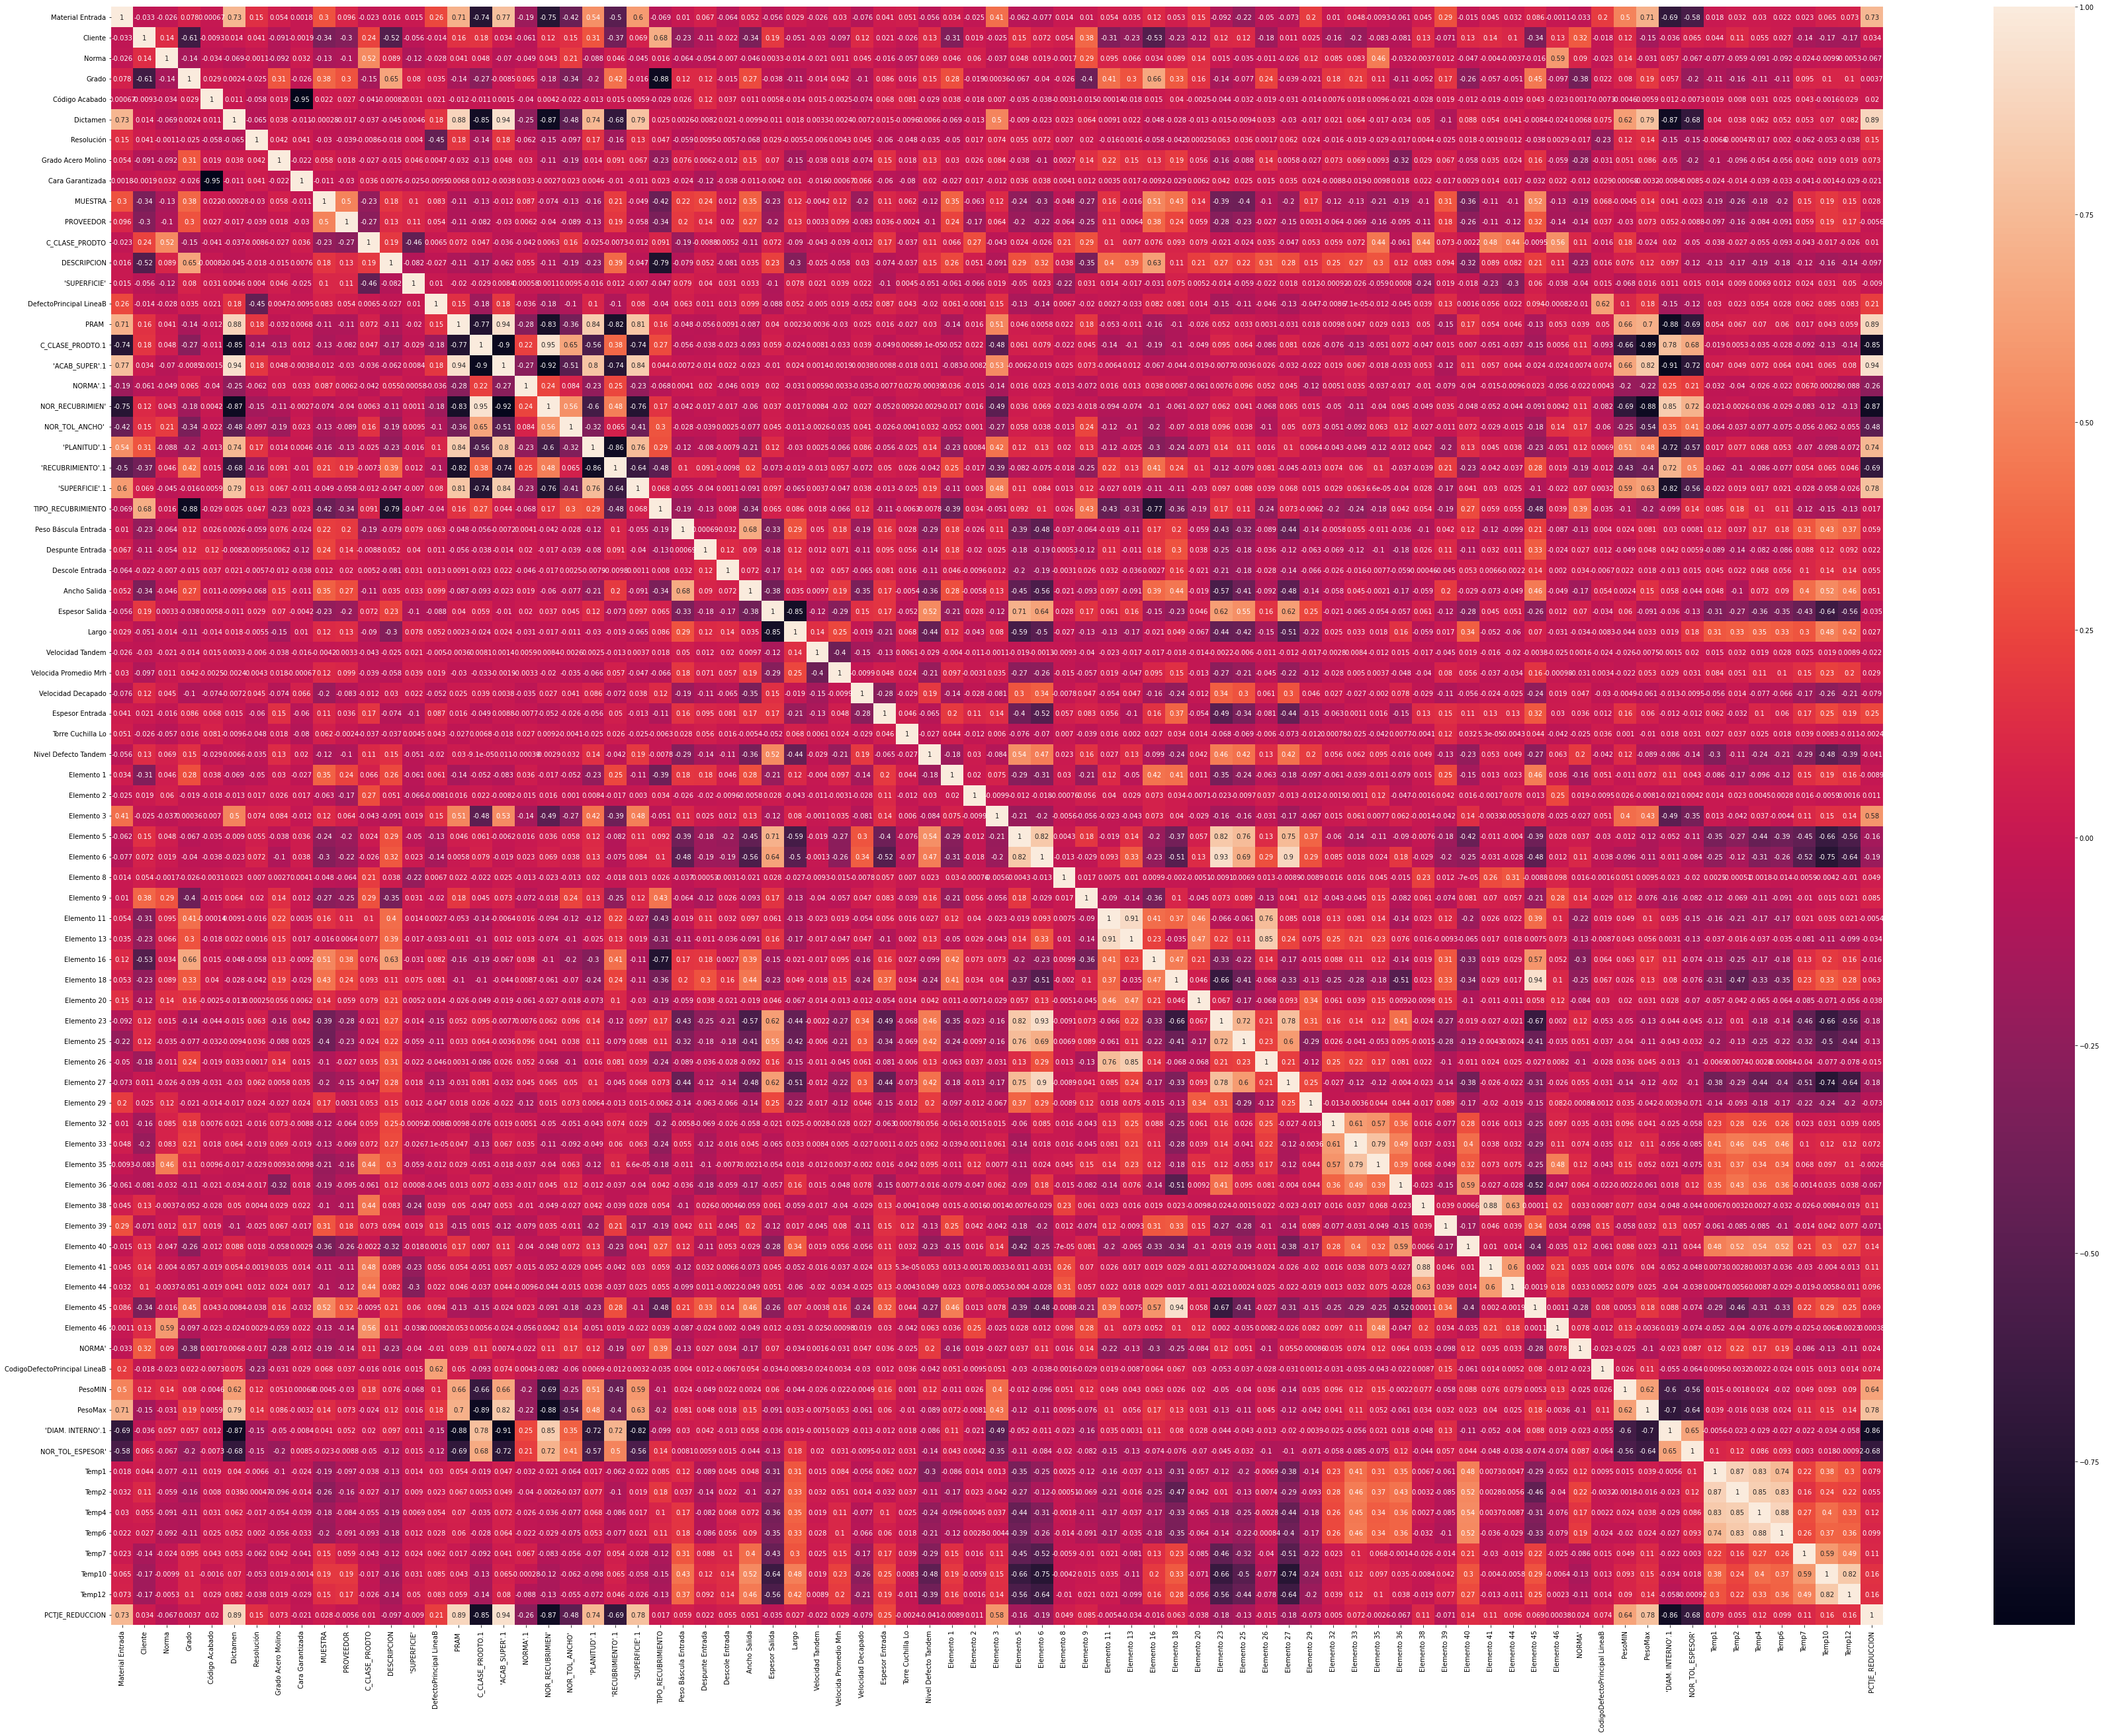

In [51]:
plt.subplots(figsize=(60,45))
sns.heatmap(finaldf2.corr(), annot=True)

### Conclusiones de los datos

#### Dataframe original

In [52]:
df.describe()

Peso Teorico  Peso Báscula          Peso  Peso Báscula Entrada  \
count  23722.000000  23722.000000  23722.000000          23719.000000   
mean   23683.633842  23761.047129  23776.155889          12637.289515   
std     3215.394066   3226.431778   3166.548831          12363.235631   
min        0.000000      0.000000    132.000000              0.000000   
25%    22479.000000  22550.000000  22560.000000              0.000000   
50%    25170.000000  25230.000000  25230.000000          16810.000000   
75%    25889.000000  25980.000000  25980.000000          25840.000000   
max    27639.000000  27790.000000  26740.000000          27010.000000   

        Peso Mínimo   Peso Máximo  Descarte Est. Prep.  Despunte Entrada  \
count  23722.000000  23722.000000          6476.000000      23292.000000   
mean   10707.916702  28517.566436           618.083539       4830.825348   
std     1735.175738   2882.198350           598.483793       1675.853056   
min    10000.000000  18000.000000             1.000000      -8830.000000   
25%    10000.000000  28806.000000           367.000000       3550.000000   
50%    10000.000000  30000.000000           447.000000       4770.000000   
75%    10900.000000  30000.000000           709.000000       5960.000000   
max    30000.000000  30000.000000          7869.000000      32767.000000   

       Descole Entrada  Subnorma  Forma Final  Ancho Salida  Ancho Mínimo  \
count     23296.000000       0.0          0.0  23722.000000  23722.000000   
mean       3539.118776       NaN          NaN   1432.056444   1415.822542   
std        1362.442006       NaN          NaN    264.347739    264.226367   
min        -515.000000       NaN          NaN    808.000000    786.000000   
25%        3229.000000       NaN          NaN   1276.000000   1265.000000   
50%        3272.000000       NaN          NaN   1452.000000   1440.000000   
75%        3675.000000       NaN          NaN   1630.000000   1614.000000   
max       32767.000000       NaN          NaN   1860.000000   1848.000000   

       Ancho Máximo  Espesor Salida  Espesor Mínimo  Espesor Máximo  \
count  23722.000000    23722.000000    23722.000000    23722.000000   
mean    1440.822542        0.930627        0.890973        0.973815   
std      264.226367        0.408901        0.394427        0.424712   
min      811.000000        0.519000        0.489500        0.570400   
25%     1290.000000        0.641000        0.618300        0.664200   
50%     1465.000000        0.695000        0.673700        0.750900   
75%     1639.000000        1.197000        1.141200        1.234800   
max     1873.000000        2.619000        2.559400        2.705400   

       Espesor Punta  Espesor Cola         Largo  Calibre  Solución  \
count            0.0           0.0  23722.000000      0.0       0.0   
mean             NaN           NaN   2670.677861      NaN       NaN   
std              NaN           NaN    852.182074      NaN       NaN   
min              NaN           NaN     22.000000      NaN       NaN   
25%              NaN           NaN   1962.000000      NaN       NaN   
50%              NaN           NaN   2818.000000      NaN       NaN   
75%              NaN           NaN   3219.000000      NaN       NaN   
max              NaN           NaN   4783.000000      NaN       NaN   

       Código Forma  Velocidad Tandem  Velocida Promedio Mrh  \
count           0.0      23683.000000           19548.000000   
mean            NaN        308.838830              75.869051   
std             NaN        154.879412              23.174207   
min             NaN          3.000000               0.000000   
25%             NaN        238.000000              62.265375   
50%             NaN        268.000000              79.078700   
75%             NaN        319.000000             100.000000   
max             NaN       2246.000000             100.000000   

       Velocidad Decapado  Diam Interior  Peso Entrada  Ancho Entrada  \
count        23722.000000        23722.0

In [53]:
df.size

8895750

In [54]:
df.shape

(23722, 375)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23722 entries, 0 to 23721
Columns: 375 entries, Material Entrada to TIPO_RECUBRIMIENTO
dtypes: float64(74), int64(243), object(58)
memory usage: 67.9+ MB


#### Dataframe limpio

In [178]:
df5.describe()

Peso Báscula Entrada  Despunte Entrada  Descole Entrada  Ancho Salida  \
count          17456.000000      17137.000000     17137.000000  17456.000000   
mean           24229.407825       4870.266266      3567.233296   1446.306426   
std             2940.023277       1673.274021      1339.764214    260.600461   
min            10330.000000      -8830.000000       -25.000000    825.000000   
25%            23290.000000       3580.000000      3241.000000   1298.000000   
50%            25490.000000       4880.000000      3273.000000   1454.000000   
75%            26170.000000       5980.000000      3677.000000   1640.000000   
max            26990.000000      32767.000000     32767.000000   1860.000000   

       Espesor Salida         Largo  Velocidad Tandem  Velocida Promedio Mrh  \
count    17456.000000  17456.000000      17433.000000           14401.000000   
mean         0.889804   2745.983254        308.988126              76.982618   
std          0.376839    830.814614        156.056838              22.796726   
min          0.519000    508.000000          3.000000               3.000000   
25%          0.638000   2117.000000        240.000000              63.731300   
50%          0.693000   2836.500000        268.000000              80.650600   
75%          0.997000   3250.000000        318.000000             100.000000   
max          2.591000   4783.000000       2246.000000             100.000000   

       Velocidad Decapado  Peso Entrada  Ancho Entrada  Espesor Entrada  \
count        17456.000000  17456.000000   17456.000000     17456.000000   
mean           108.109704  24529.572582    1436.731608         3.689023   
std             31.915635   2918.472336     261.058359         0.646286   
min              9.000000  10550.000000     815.000000         2.300000   
25%             89.000000  23700.000000    1290.000000         3.200000   
50%            104.000000  25870.000000    1443.000000         3.500000   
75%            122.000000  26490.000000    1630.000000         4.000000   
max            210.000000  26990.000000    1848.000000         6.500000   

       Ancho Set Trimmer  Torre Cuchilla Lo  Torre Cuchilla Lm  \
count       17456.000000       17456.000000       17456.000000   
mean         1436.699015           1.552016           1.557058   
std           261.024821           0.497301           0.496748   
min           815.000000           1.000000           1.000000   
25%          1290.000000           1.000000           1.000000   
50%          1443.000000           2.000000           2.000000   
75%          1630.000000           2.000000           2.000000   
max          1848.000000           2.000000           2.000000   

       Nivel Defecto Tandem  Nivel Defecto Decapado    Elemento 1  \
count          17456.000000            17456.000000  17456.000000   
mean               4.042392                5.042392      0.031775   
std                0.999130                0.999130      0.006826   
min                3.000000                4.000000      0.010000   
25%                3.000000                4.000000      0.029000   
50%                5.000000                6.000000      0.030000   
75%                5.000000                6.000000      0.038000   
max                5.000000                6.000000      0.061900   

         Elemento 2    Elemento 3    Elemento 5    Elemento 6    Elemento 7  \
count  17456.000000  17456.000000  17456.000000  17456.000000  17456.000000   
mean       0.000008      0.000105      0.022052      0.098934      0.096703   
std        0.000255      0.000203      0.037663      0.126092      0.122969   
min        0.000000      0.000000      0.000000      0.005830      0.005170   
25%        0.000000      0.000000      0.000000      0.015170      0.013670   
50%        0.000000      0.000000      0.001000      0.020000      0.020000   
75%        0.000000      0.000200      0.040000      0.110000      0.102000   
max        0.010000      0.002100      0

In [57]:
df5.size

2164544

In [58]:
df5.shape

(17456, 124)

In [59]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 23721
Columns: 124 entries, Material Entrada to TIPO_RECUBRIMIENTO
dtypes: float64(57), int64(23), object(44)
memory usage: 16.6+ MB


### 3- Transformación de datos

#### No consideramos necesario discretizar los datos o normalizarlos o construir atributos hasta este momento porque al hacerlo, podríamos quitar información que pudiera ser relevante para el modelo a seleccionar, pero esto podría cambiar al intentar aplicarle modelos al dataframe

### 4- Reformateo/reestructuración de datos

#### La reestructuración se realizó al momento de la limpieza de datos, el dataframe resultante fue el reformateo de los datos

In [60]:
df5

Material Entrada    Material Salida     Cliente  Peso Báscula Entrada  \
0      MatEnt_00001MAC00  MatSal_00001PDT00  Cliente 30               26530.0   
3      MatEnt_00004MAC00  MatSal_00004PDT00  Cliente 16               24530.0   
5      MatEnt_00006MAC00  MatSal_00006PDT00  Cliente 11               26100.0   
6      MatEnt_00007MAC00  MatSal_00007PDT00  Cliente 11               25000.0   
7      MatEnt_00008MAC00  MatSal_00008PDT00  Cliente 11               25830.0   
...                  ...                ...         ...                   ...   
23717  MatEnt_23718MAC00  MatSal_23718PDT00  Cliente 11               23590.0   
23718  MatEnt_23719MAC00  MatSal_23719PDT00  Cliente 11               23700.0   
23719  MatEnt_23720MAC00  MatSal_23720PDT00  Cliente 11               25650.0   
23720  MatEnt_23721MAC00  MatSal_23721PDT00  Cliente 11               25360.0   
23721  MatEnt_23722MAC00  MatSal_23722PDT00  Cliente 11               24810.0   

       Despunte Entrada  Descole Entrada    Norma      Grado  Ancho Salida  \
0                6710.0           3279.0  Norma 1  TNA_00047        1370.0   
3                5960.0           4865.0  Norma 1  TNA_00033        1580.0   
5                6130.0           4869.0  Norma 1  TNG_00042        1745.0   
6                7310.0           4860.0  Norma 1  TNG_00031        1835.0   
7                5860.0           4857.0  Norma 1  TNG_00031        1835.0   
...                 ...              ...      ...        ...           ...   
23717            6480.0           3275.0  Norma 1  TNG_00027        1448.0   
23718            4690.0           3264.0  Norma 1  TNG_00027        1454.0   
23719            4640.0           3265.0  Norma 1  TNG_00027        1452.0   
23720            6350.0           3277.0  Norma 1  TNG_00027        1453.0   
23721            6590.0           3272.0  Norma 1  TNG_00027        1454.0   

       Espesor Salida   Largo Código Acabado  Velocidad Tandem  \
0               0.588  4203.0       MATE TNG             317.0   
3               0.692  2837.0       MATE TNG             257.0   
5               0.688  2763.0       MATE TNG             326.0   
6               0.587  2760.0           MATE              97.0   
7               0.587  3039.0           MATE             794.0   
...               ...     ...            ...               ...   
23717           0.889  2311.0           MATE             203.0   
23718           0.889  2331.0           MATE             202.0   
23719           0.889  2505.0           MATE             220.0   
23720           0.890  2492.0           MATE             221.0   
23721           0.889  2482.0           MATE             210.0   

       Velocida Promedio Mrh  Velocidad Decapado  Dictamen  Peso Entrada  \
0                    87.1617                  81  ACEPTADO         26560   
3                    83.0547                 132  ACEPTADO         24630   
5                        NaN                 108  RETENIDO         26100   
6                   100.0000                  80  ACEPTADO         24990   
7                    48.7928                  28  ACEPTADO         25870   
...                      ...                 ...       ...           ...   
23717                    NaN                  92  RETENIDO         23690   
23718                84.9851                 115  ACEPTADO         23700   
23719               100.0000                 117  ACEPTADO         25720   
23720                    NaN                 110  RETENIDO         25460   
23721                    NaN                 162  ACEPTADO         25410   

              Resolución  Ancho Entrada  Espesor Entrada            PRAM  \
0      CON OBSERVACIONES         1358.0              3.2  Pram_0000160A0   
3      CON OBSERVACIONES         1567.0              4.0  Pram_0000370A0   
5      CALIDAD DE PLANTA         1733.0              3.5  Pram_0000675A0   
6            SOBRE ORDEN         1823.0              3.5  Pram_0000770A0   
7      CON O

## 3) Conclusiones de métodología CRISP

* Business understanding: La empresa Ternium nos proporcionó una presentación para poder comprender los objetivos del proyecto, la presentación incluía el contexto del proceso industrial con materia prima, también se incluyen las premisas, en las cuáles se menciona que se busca predecir los defectos probables con los que sale el material en línea de Recubiertos, tanto el contexto como las premisas incluyen gráficos que facilitan su entendimiento. Finalmente, se incluyó el objetivo de la empresa, sus alcances esperados, el beneficio del negocio y las áreas impactadas. La información proporcionada nos permitió conocer a la empresa, saber el contexto de lo que quieren y esperan para poder trabajar en un proyecto adecuado a sus objetivos.

* Data understanding: En la primera etapa del reto, se realizó un trabajo sobre la comprensión del negocio y los datos, en el cuál se incluyó la descripción del problema específico, idea central del proyecto, hipótesis, justificación, objetivos general y específicos, justificación, en la que cada miembro del equipo citó un artículo científico relacionado al problema, se incluyó una descripción general del mercado potencial, además de identificar clientes/consumidores y usuarios, con el dataset que nos proporcionó la empresa se realizó una descripción de las fuentes de información, de igual manera se incluyó el impacto social principal y hacia los Objetivos de Desarrollo Sostenible, finalmente se incluyó una línea del tiempo describiendo las actividades a realizar en cada semana del proyecto.

* Data preparation: Se realizó la comprensión de los datos del negocio, que incluye la dimensión del dataset, la descripción de los datos, exploración de los datos, verificar la calidad de los datos, también se llevó a cabo la preparación de los datos en dónde se selecciona el conjunto de datos a utilizar, la limpieza, transformación y en caso de ser necesario, la reestructuración de datos.

# Etapa 3

## Resumen de las variables relevantes

In [61]:
notcommon_cols = list(set(df5.columns).difference(finaldf2.columns))

df_info = df5.drop(notcommon_cols, axis = 1)

descripcion = pd.concat(
  [df_info.count().rename("Número de valores"),
   df_info.apply(pd.Series.nunique).rename("Número de valores únicos"),
   df_info.dtypes.rename("Tipo de dato"),
   df_info.apply(pd.Series.unique).rename("Posibles valores")],
  axis = 1
)

is_categorical = (descripcion["Tipo de dato"] == 'object').values

descripcion

# descripcion["Variable"] = list(df_info.columns)

# descripcion

columna_descripcion = ["Nombre del material de línea A",
"Número de cliente",
"Tipo de norma para la línea A",
"Número de grado",
"Código de acabado",
"Si el metal fue aceptado o retenido",
"Resolución del metal ",
"Tipo de grado de acero de cada molino",
"Cual es la cara garantizada del metal",
"Código de muestra",
"Tipo de proveedor",
"Tipo de clase de cada producto",
"Descripción del producto en línea B",
"Tipo de superficie del producto",
"Código en defecto Línea B",
"Código de pram en cliente Final",
"Tipo de clase de cada producto en Recubiertos",
"Acabado de la superficie de cada material en Recubiertos",
"Número de norma para los Recubiertos",
"Tipo de norma para los Recubiertos",
"Tipo de número de acho para los Recubiertos",
"Tipo de número de planitud para los Recubiertos",
"Modelo de recubrimiento",
"Tipo de superficie en Recubrimientos",
"Tipo de Recubrimiento",
"El peso inicial de cada metal",
"Cantidad de desperdicio en la punta de cada material",
"Cantidad de desperdicio en la cola de cada material",
"Ancho de cada material en salida",
"Espesor de cada material en salida",
"Largo de cada material en salida",
"Velocidad del molino tandem",
"Velocidad promedio de mrh",
"Velocidad del proceso del tratamiento del metal para eliminar impurezas",
"Espesor de cada material en entrada",
"Tipo de cuchilla utilizada en Línea A",
"Nivel de defecto en el molino tandem",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Química del abasto",
"Tipo de norma para la línea B",
"Código de defecto principal de la línea B",
"Peso mínimo para cada material para el cliente final",
"Peso máximo para cada material para el cliente final",
"Diámetro interno de cada rollo",
"Tipo de número de espesor para el cliente final de los Recubiertos",
"Grados de temperatura 1",
"Grados de temperatura 2",
"Grados de temperatura 4",
"Grados de temperatura 6",
"Grados de temperatura 7",
"Grados de temperatura 10",
"Grados de temperatura 12",
"Porcentaje de reducción del metal"]

descripcion["Descripción"] = columna_descripcion

descripcion


path = "finaldf2_1.csv"
with open(path, 'w', encoding = 'utf-8-sig') as f:
  finaldf2.to_csv(f, index = False)


In [62]:
descripcion

Número de valores  Número de valores únicos  \
Material Entrada                  17456                     17443   
Cliente                           17456                        27   
Peso Báscula Entrada              17456                      1236   
Despunte Entrada                  17137                       796   
Descole Entrada                   17137                      1077   
...                                 ...                       ...   
Temp7                             17456                       312   
Temp10                            17456                       165   
Temp12                            17456                       197   
PCTJE_REDUCCION                   17456                      1126   
TIPO_RECUBRIMIENTO                17456                         2   

                     Tipo de dato  \
Material Entrada           object   
Cliente                    object   
Peso Báscula Entrada      float64   
Despunte Entrada          float64   
Descole Entrada           float64   
...                           ...   
Temp7                       int64   
Temp10                      int64   
Temp12                      int64   
PCTJE_REDUCCION           float64   
TIPO_RECUBRIMIENTO         object   

                                                       Posibles valores  \
Material Entrada      [MatEnt_00001MAC00, MatEnt_00004MAC00, MatEnt_...   
Cliente               [Cliente 30, Cliente 16, Cliente 11, Cliente 2...   
Peso Báscula Entrada  [26530.0, 24530.0, 26100.0, 25000.0, 25830.0, ...   
Despunte Entrada      [6710.0, 5960.0, 6130.0, 7310.0, 5860.0, 5720....   
Descole Entrada       [3279.0, 4865.0, 4869.0, 4860.0, 4857.0, 4870....   
...                                                                 ...   
Temp7                 [623, 767, 804, 795, 772, 770, 794, 612, 608, ...   
Temp10                [660, 651, 677, 666, 668, 652, 636, 650, 647, ...   
Temp12                [659, 649, 674, 665, 650, 666, 648, 633, 647, ...   
PCTJE_REDUCCION       [0.81625, 0.827, 0.8034285714285715, 0.8322857...   
TIPO_RECUBRIMIENTO                                   [RECUB02, RECUB01]   

                                            Descripción  
Material Entrada         Nombre del material de línea A  
Cliente                               Número de cliente  
Peso Báscula Entrada      Tipo de norma para la línea A  
Despunte Entrada                        Número de grado  
Descole Entrada                       Código de acabado  
...                                                 ...  
Temp7                           Grados de temperatura 6  
Temp10                          Grados de temperatura 7  
Temp12                         Grados de temperatura 10  
PCTJE_REDUCCION                Grados de temperatura 12  
TIPO_RECUBRIMIENTO    Porcentaje de reducción del metal  

[79 rows x 5 columns]

## Gráfica de pastel de una columna de variable categórica

In [63]:
plt.imread("output.png")

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

#### En esta gráfica se pueden observar en el eje de las x todos los defectos a considerar para nuestro análisis, que de igual manera representarán la variable target para nuestros modelos. En el eje de las y, está la cantidad de defectos que hay, entonces al observar la gráfica se pueden ver las cantidades de defectos en la base de datos. Hay que notar que esta gráfica se hizo antes de la limpieza de datos.

# Fase de generación de modelos

## Información general del dataset de datos a utilizar

In [64]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 23721
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Material Entrada               17456 non-null  int32  
 1   Cliente                        17456 non-null  int32  
 2   Norma                          17456 non-null  int32  
 3   Grado                          17456 non-null  int32  
 4   Código Acabado                 17456 non-null  int32  
 5   Dictamen                       17456 non-null  int32  
 6   Resolución                     17456 non-null  int32  
 7   Grado Acero Molino             17456 non-null  int32  
 8   Cara Garantizada               17456 non-null  int32  
 9   MUESTRA                        17456 non-null  int32  
 10  PROVEEDOR                      17456 non-null  int32  
 11  C_CLASE_PRODTO                 17456 non-null  int32  
 12  DESCRIPCION                    17456 non-null 

In [121]:
borrarCol = ["Material Entrada", 
             "Dictamen", 
             "Resolución", 
             "DESCRIPCION", 
             "Ancho Salida", 
             "Espesor Salida", 
             "PesoMIN", 
             "PesoMax", 
             "PCTJE_REDUCCION",
             "'ACAB_SUPER'.1",
             "NORMA'.1",
             "'PLANITUD'.1",
             "'RECUBRIMIENTO'.1",
             "'SUPERFICIE'.1",
             "'DIAM. INTERNO'.1",
             "NORMA'",
             "NOR_TOL_ESPESOR'",
             "NOR_RECUBRIMIEN'",
             "NOR_TOL_ANCHO' ",
             #"DefectoPrincipal LineaB"
             ]

In [142]:
[*enumerate(finaldf2.columns)]

[(0, 'Material Entrada'),
 (1, 'Cliente'),
 (2, 'Norma'),
 (3, 'Grado'),
 (4, 'Código Acabado'),
 (5, 'Dictamen'),
 (6, 'Resolución'),
 (7, 'Grado Acero Molino'),
 (8, 'Cara Garantizada'),
 (9, 'MUESTRA'),
 (10, 'PROVEEDOR'),
 (11, 'C_CLASE_PRODTO'),
 (12, 'DESCRIPCION'),
 (13, "'SUPERFICIE'"),
 (14, 'DefectoPrincipal LineaB'),
 (15, 'PRAM '),
 (16, 'C_CLASE_PRODTO.1'),
 (17, "'ACAB_SUPER'.1"),
 (18, "NORMA'.1"),
 (19, "NOR_RECUBRIMIEN'"),
 (20, "NOR_TOL_ANCHO' "),
 (21, "'PLANITUD'.1"),
 (22, "'RECUBRIMIENTO'.1"),
 (23, "'SUPERFICIE'.1"),
 (24, 'TIPO_RECUBRIMIENTO'),
 (25, 'Peso Báscula Entrada'),
 (26, 'Despunte Entrada'),
 (27, 'Descole Entrada'),
 (28, 'Ancho Salida'),
 (29, 'Espesor Salida'),
 (30, 'Largo'),
 (31, 'Velocidad Tandem'),
 (32, 'Velocida Promedio Mrh'),
 (33, 'Velocidad Decapado'),
 (34, 'Espesor Entrada'),
 (35, 'Torre Cuchilla Lo'),
 (36, 'Nivel Defecto Tandem'),
 (37, 'Elemento 1'),
 (38, 'Elemento 2'),
 (39, 'Elemento 3'),
 (40, 'Elemento 5'),
 (41, 'Elemento 6'),

In [143]:
finaldf3 = finaldf2[finaldf2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,14,65,66,67,68,69,70,71,72,73,74,75,76,77,78]]]

In [145]:
finaldf3 = finaldf3.copy()

finaldf3 = finaldf3.drop(borrarCol, axis=1)

path = "finaldf3.csv"
with open(path, 'w', encoding = 'utf-8-sig') as f:
  finaldf3.to_csv(f, index = False)

In [67]:
# print([*enumerate(X.columns)])

## Variable target (dependiente) y variables predictoras (independiente)

### La variable target será la columna de los defectos, ya que se busca saber qué procesos y características llevan a tener un defecto en el producto, y para esto, se definen las variables predictoras que serán las demás columnas del dataframe, con excepeción de la variable dependiente

### Resumen de los modelos:

Fase de Generación de modelos de aprendizaje y su evaluación
		i) Antes de empezar a modelar, primero se mostrará a continuación información relevante de nuestros datos previamente filtrados. Asimismo, se mostrarán algunas de las variables que consideramos relevantes para este mismo análisis. 

		ii) En este caso, definiremos como nuestra variable “target” la variable de los defectos. Esto, debido a que nuestro proyecto se enfoca en buscar predecir si un rollo va a tener un defecto con base en su procesamiento. Asimismo, vamos a definir como variables predictoras las variables de temperatura, de despunte, descole, su espesor, su porcentaje de reducción, entre otras para buscar predecir nuestra variable target.

		iii) En este proyecto, nos enfocaremos en utilizar un modelo de clasificación. Esto, debido a que las variables son principalmente categóricas y no numéricas, por lo que es más conveniente el utilizar un modelo de clasificación sobre uno de regresión. 

		iv) Dataset para entrenamiento y prueba

		v) Los modelos de clasificación que fueron utilizados para hacer nuestro análisis fueron el modelo Linear svc, Decision Tree classifier, Random forest classifier, K means y Spectral clustering. Esto, con el propósito de buscar el modelo que nos pueda aportar mayormente a la predicción de los defectos que puedan surgir en los rollos. 

Cuando hablamos del modelo Linear svc, se hace referencia al modelo “Support vector classifier” o también conocido como “Support vector machine”. Este modelo busca categorizar los datos que sean proporcionados en un hiperplano para que, con base en estos mismos, se pueda crear una predicción. 

Los clasificadores de K means y de Spectral clustering son parecidos en cuanto a la forma en la cual categorizan y dividen los datos en agrupaciones, sin embargo, el clasificador “spectral clustering” se enfoca más en la descomposición espectral de los datos, mientras que el clasificador “k means” se enfoca más en hacer un número k de agrupaciones. 

Los árboles de decisión o “Decision Tree classifier” tienen un mayor enfoque en buscar clasificar los datos con base en reglas de decisión con respuestas binarias. Ahora bien, si juntamos varios clasificadores de árboles de decisión y sacamos su promedio, podemos llegar a un clasificador llamado “Bosques Aleatorios” o “Random forest classifier”. Este mismo clasificador lo utilizamos debido a que puede ayudarnos a mejorar la precisión de nuestro modelaje.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

* LinearSVC - Classification

In [169]:
X = finaldf3.drop("CodigoDefectoPrincipal LineaB",axis=1)
y = finaldf3["CodigoDefectoPrincipal LineaB"]

In [147]:
X.shape

(17456, 59)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Score de validación cruzada

In [155]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X_train, y_train, cv=3))

[0.41639619 0.40624659 0.41044013]


RUSBoost

In [173]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.datasets import make_classification

dt = RUSBoostClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [109]:
dt = svm.LinearSVC(max_iter=100) 
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Métricas de evaluación del modelo

In [174]:
accuracy = accuracy_score(
            y_true    = y_test, 
            y_pred    = y_pred, 
            normalize = True)
print(f"Modelo LinearSVC")
print("")
print(f"Test size: 0.2")
print("")
print(f"El accuracy test del modelo LinearSVC: {100*accuracy}%")

precision = precision_score(
            y_true    = y_test,
            y_pred    = y_pred,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo LinearSVC

Test size: 0.2

El accuracy test del modelo LinearSVC: 7.646048109965636%

El test de precisón es de: 7.646048109965636%

Sensitividad 1.0

Especificidad 1.0


* DecisionTreeClassifier - Classification

In [150]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [151]:
import pickle

filename = 'modelo.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [152]:
X
X1 = X.iloc[-2:]
X1

Cliente  Norma  Grado  Código Acabado  Grado Acero Molino  \
23720        0      0     39               1                  19   
23721        0      0     39               1                  19   

       Cara Garantizada  MUESTRA  PROVEEDOR  C_CLASE_PRODTO  'SUPERFICIE'  \
23720                 2     2584          6               0             1   
23721                 2     2596          6               0             1   

       PRAM   C_CLASE_PRODTO.1  TIPO_RECUBRIMIENTO  Peso Báscula Entrada  \
23720      3                 1                   0               25360.0   
23721      3                 1                   0               24810.0   

       Despunte Entrada  Descole Entrada   Largo  Velocidad Tandem  \
23720            6350.0           3277.0  2492.0             221.0   
23721            6590.0           3272.0  2482.0             210.0   

       Velocida Promedio Mrh  Velocidad Decapado  Espesor Entrada  \
23720              76.982618                 110              4.5   
23721              76.982618                 162              4.5   

       Torre Cuchilla Lo  Nivel Defecto Tandem  Elemento 1  Elemento 2  \
23720                  2                     3        0.04         0.0   
23721                  2                     3        0.03         0.0   

       Elemento 3  Elemento 5  Elemento 6  Elemento 8  Elemento 9  \
23720         0.0         0.0        0.02         0.0         0.0   
23721         0.0         0.0        0.02         0.0         0.0   

       Elemento 11  Elemento 13  Elemento 16  Elemento 18  Elemento 20  \
23720         0.08         0.02         0.02         0.06         0.02   
23721         0.07         0.02         0.02         0.05         0.02   

       Elemento 23  Elemento 25  Elemento 26  Elemento 27  Elemento 29  \
23720         0.04          0.0          0.0         0.08         0.01   
23721         0.05          0.0          0.0         0.06         0.01   

       Elemento 32  Elemento 33  Elemento 35  Elemento 36  Elemento 38  \
23720          0.0          0.0          0.0         0.01          0.0   
23721          0.0          0.0          0.0         0.01          0.0   

       Elemento 39  Elemento 40  Elemento 41  Elemento 44  Elemento 45  \
23720        25.45          0.0          0.0          0.0         0.06   
23721        19.29          0.0          0.0          0.0         0.05   

       Elemento 46  DefectoPrincipal LineaB  Temp1  Temp2  Temp4  Temp6  \
23720          0.0                       15    800    773    782    779   
23721          0.0                       15    800    770    782    779   

       Temp7  Temp10  Temp12  
23720    713     651     649  
23721    713     651     649

In [153]:
X1.shape

(2, 59)

In [154]:
X1.to_csv("testdf2.csv", index=False)

In [115]:
dfprueba = pd.read_csv("testdf.csv")

In [80]:
dfprueba

Cliente  Norma  Grado  Código Acabado  Grado Acero Molino  \
0        0      0     39               1                  19   

   Cara Garantizada  MUESTRA  PROVEEDOR  C_CLASE_PRODTO  'SUPERFICIE'  PRAM   \
0                 2     2596          6               0             1      3   

   C_CLASE_PRODTO.1  TIPO_RECUBRIMIENTO  Peso Báscula Entrada  \
0                 1                   0               24810.0   

   Despunte Entrada  Descole Entrada   Largo  Velocidad Tandem  \
0            6590.0           3272.0  2482.0             210.0   

   Velocida Promedio Mrh  Velocidad Decapado  Espesor Entrada  \
0              76.982618                 162              4.5   

   Torre Cuchilla Lo  Nivel Defecto Tandem  Elemento 1  Elemento 2  \
0                  2                     3        0.03         0.0   

   Elemento 3  Elemento 5  Elemento 6  Elemento 8  Elemento 9  Elemento 11  \
0         0.0         0.0        0.02         0.0         0.0         0.07   

   Elemento 13  Elemento 16  Elemento 18  Elemento 20  Elemento 23  \
0         0.02         0.02         0.05         0.02         0.05   

   Elemento 25  Elemento 26  Elemento 27  Elemento 29  Elemento 32  \
0          0.0          0.0         0.06         0.01          0.0   

   Elemento 33  Elemento 35  Elemento 36  Elemento 38  Elemento 39  \
0          0.0          0.0         0.01          0.0        19.29   

   Elemento 40  Elemento 41  Elemento 44  Elemento 45  Elemento 46  Temp1  \
0          0.0          0.0          0.0         0.05          0.0    800   

   Temp2  Temp4  Temp6  Temp7  Temp10  Temp12  
0    770    782    779    713     651     649

In [81]:
y_pred2 = dt.predict(dfprueba)

In [82]:
print(y_pred2)

[627]


In [83]:
y

0          0
3          0
5          0
6          0
7         22
        ... 
23717    627
23718    627
23719    627
23720    627
23721    627
Name: CodigoDefectoPrincipal LineaB, Length: 17456, dtype: int64

## Métricas de evaluación del modelo

In [118]:
accuracy = accuracy_score(
            y_true    = y_test, 
            y_pred    = y_pred, 
            normalize = True)
print(f"Modelo DecisionTreeClassifier")
print("")
print(f"Test size: 0.2")
print("")
print(f"El accuracy test del modelo DecisionTreeClassifier: {100*accuracy}%")

precision = precision_score(
            y_true    = y_test,
            y_pred    = y_pred,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo DecisionTreeClassifier

Test size: 0.2

El accuracy test del modelo DecisionTreeClassifier: 97.13631156930126%

El test de precisón es de: 97.13631156930126%

Sensitividad 1.0

Especificidad 1.0


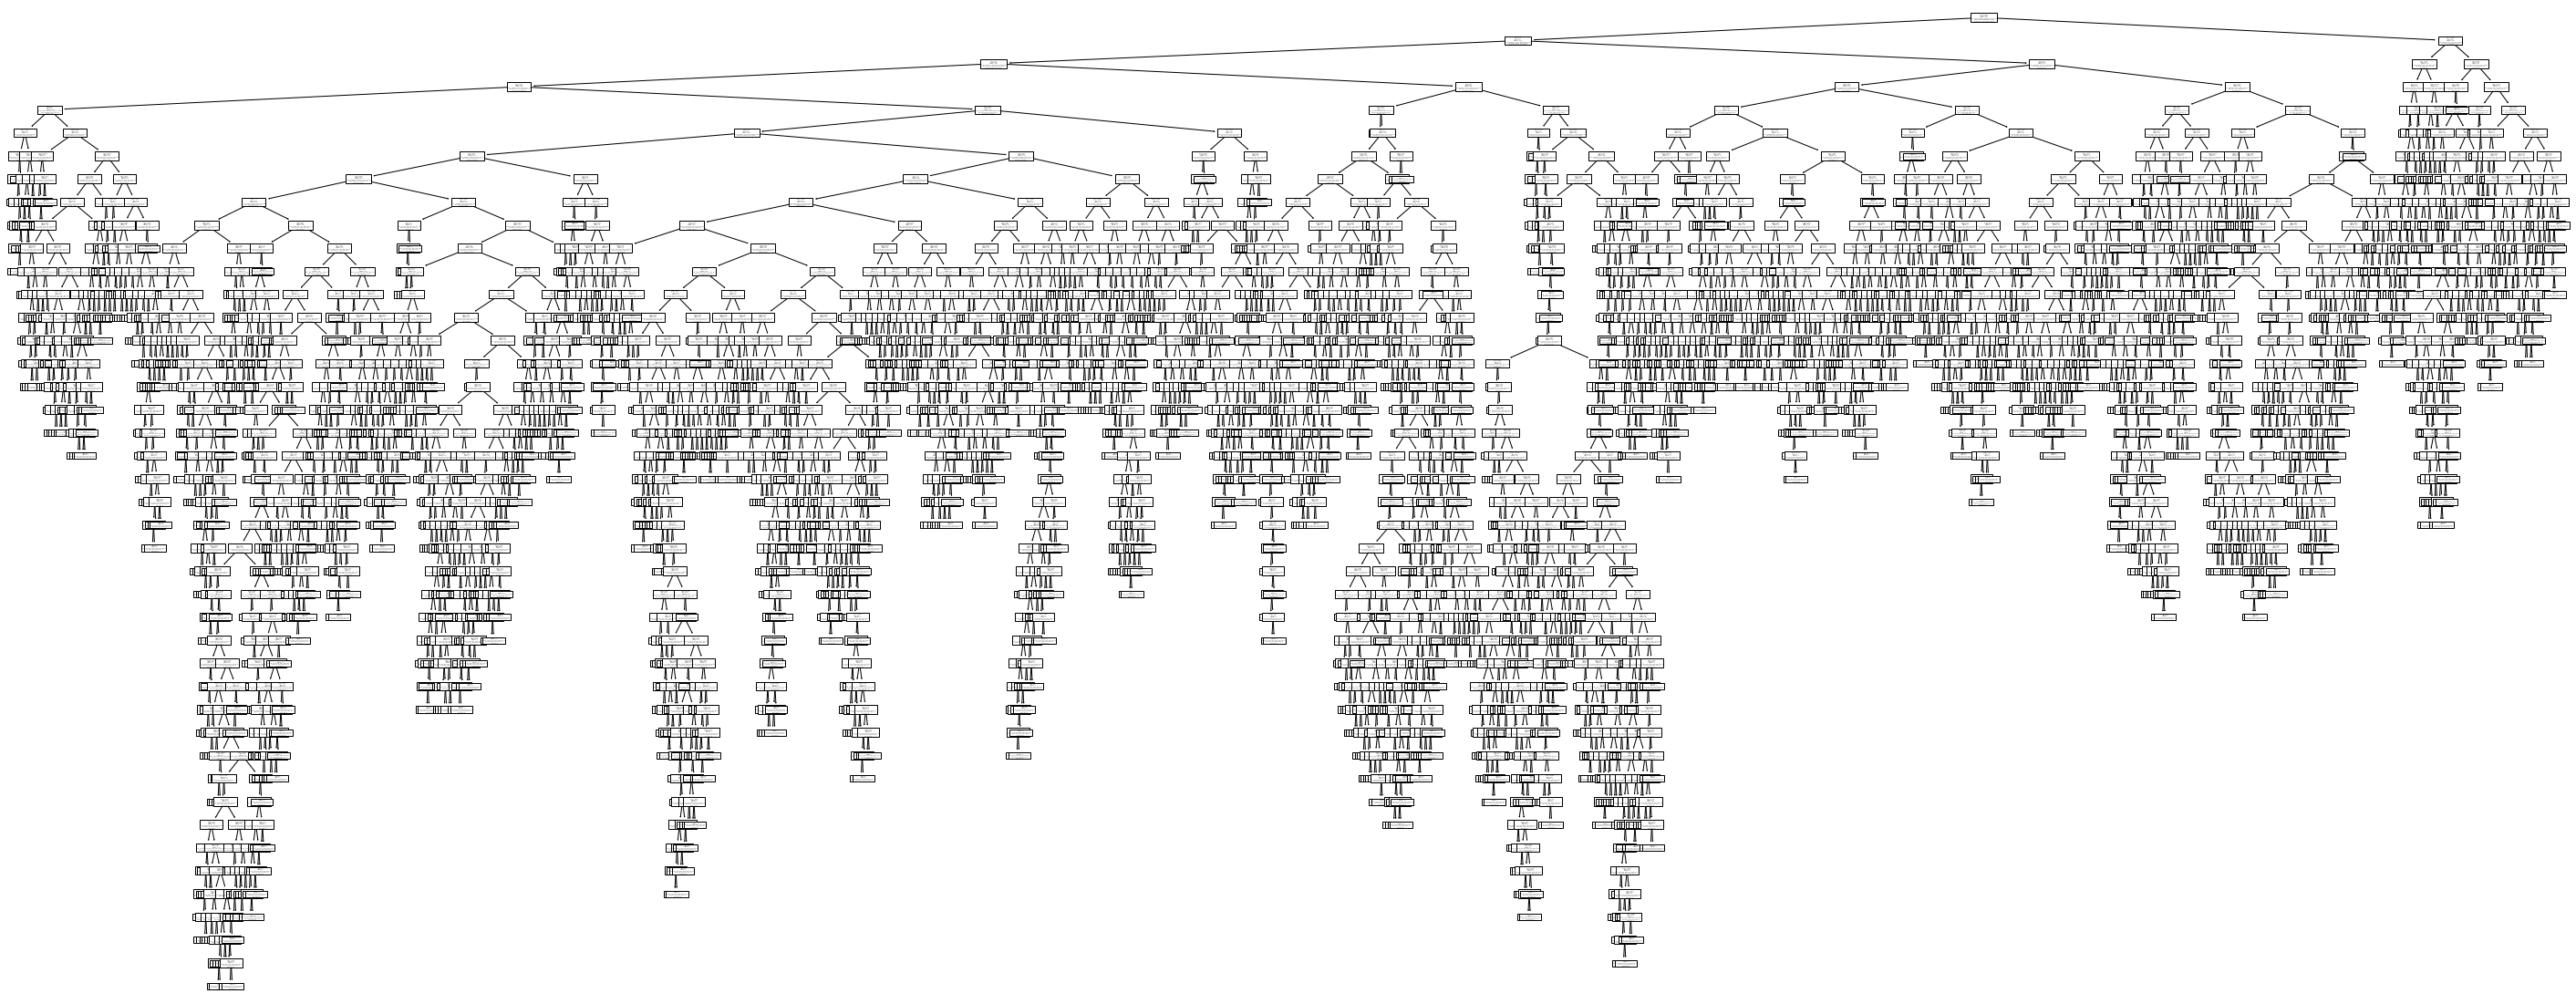

In [85]:
# from sklearn import tree

# clf = DecisionTreeClassifier(criterion = "gini")
# clf.fit(X_train, y_train)

# plt.figure(figsize=(50,20))
# tree.plot_tree(clf.fit(X_train, y_train))
# plt.savefig("graph.pdf")
# None

* RandomForestClassifier - Classification

In [86]:
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Métricas de evaluación del modelo

In [87]:
accuracy = accuracy_score(
            y_true    = y_test, 
            y_pred    = y_pred, 
            normalize = True)
print(f"Modelo RandomForestClassifier")
print("")
print(f"Test size: 0.2")
print("")
print(f"El accuracy test del modelo RandomForestClassifier: {100*accuracy}%")

precision = precision_score(
            y_true    = y_test,
            y_pred    = y_pred,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo RandomForestClassifier

Test size: 0.2

El accuracy test del modelo RandomForestClassifier: 78.20733104238259%

El test de precisón es de: 78.20733104238259%

Sensitividad 0.9855750487329434

Especificidad 0.2862453531598513


* LinearDiscriminationAnalysis

In [88]:
dt = LinearDiscriminantAnalysis(n_components=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Métricas de evaluación del modelo

In [89]:
accuracy = accuracy_score(
            y_true    = y_test, 
            y_pred    = y_pred, 
            normalize = True)
print(f"Modelo LinearDiscriminationAnalysis")
print("")
print(f"Test size: 0.2")
print("")
print(f"El accuracy test del modelo LinearDiscriminationAnalysis: {100*accuracy}%")

precision = precision_score(
            y_true    = y_test,
            y_pred    = y_pred,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo LinearDiscriminationAnalysis

Test size: 0.2

El accuracy test del modelo LinearDiscriminationAnalysis: 64.5475372279496%

El test de precisón es de: 64.5475372279496%

Sensitividad 0.9388235294117647

Especificidad 0.6310679611650485


* LogisticRegression

In [90]:
dt = LogisticRegression(max_iter=999999)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Métricas de evaluación del modelo

In [91]:
# accuracy = accuracy_score(
#             y_true    = y_test, 
#             y_pred    = y_pred, 
#             normalize = True)
# print(f"Modelo LogisticRegression")
# print("")
# print(f"Test size: 0.2")
# print("")
# print(f"El accuracy test del modelo LogisticRegression: {100*accuracy}%")

# precision = precision_score(
#             y_true    = y_test,
#             y_pred    = y_pred,
#             average = "micro"
#            )
# print("")
# print(f"El test de precisón es de: {100*precision}%")
# print("")
# cf = confusion_matrix(
#             y_true    = y_test,
#             y_pred    = y_pred,
#             normalize = "true")
# sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
# print('Sensitividad',sensitivityTP)
# specificity = cf[1,1]/(cf[1,0]+cf[1,1])
# print("")
# print('Especificidad',specificity)

* KMeans - Clustering

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

In [93]:
finaldf2["CodigoDefectoPrincipal LineaB"].nunique()

35

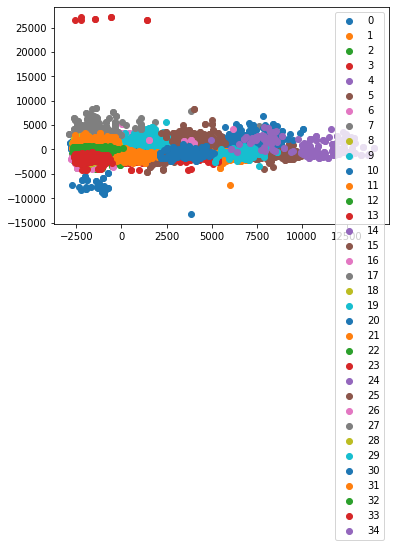

In [94]:
#Load Data
pca = PCA(35)

# finaldf3 = finaldf2.copy()

#Transform the data
finaldf3 = pca.fit_transform(X)

#Initialize the class object
kmeans = KMeans(n_clusters=35)
#kmeans = DBSCAN(eps = 2)

#predict the labels of clusters.
label = kmeans.fit_predict(finaldf3)

true_labels = finaldf2["CodigoDefectoPrincipal LineaB"]

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(finaldf3[label == i , 0] , finaldf3[label == i , 1] , label = i)

plt.legend()
plt.show()

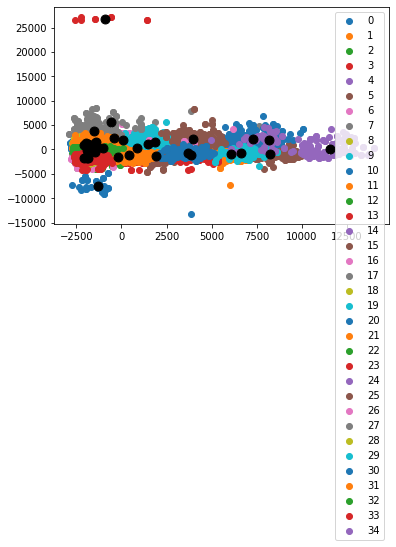

In [95]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(finaldf3[label == i , 0] , finaldf3[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
plt.legend()
plt.show()

## Métricas de evaluación del modelo

In [96]:
accuracy = accuracy_score(
            y_true    = true_labels, 
            y_pred    = label, 
            normalize = True)
print(f"Modelo KMeans")
print("")
print(f"35 KMeans")
print("")
print(f"El accuracy test del modelo KMeans: {100*accuracy}%")

precision = precision_score(
            y_true    = true_labels,
            y_pred    = label,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = true_labels,
            y_pred    = label,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo KMeans

35 KMeans

El accuracy test del modelo KMeans: 3.7465627864344637%

El test de precisón es de: 3.7465627864344637%

Sensitividad 0.6185044359949302

Especificidad nan


C:\Users\danie\AppData\Local\Temp/ipykernel_24752/4047987949.py:25: RuntimeWarning: invalid value encountered in double_scalars
  specificity = cf[1,1]/(cf[1,0]+cf[1,1])


* Spectral Clustering - Clustering

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\danie\AppData\Local\Programs\Python\P

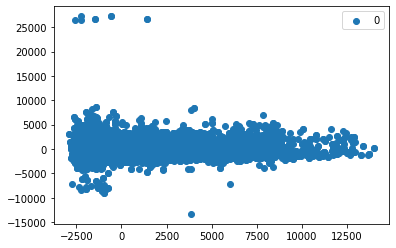

In [97]:
#Load Data
pca = PCA(35)

# finaldf3 = finaldf2.copy()

#Transform the data
finaldf3 = pca.fit_transform(X)

#Initialize the class object
sc = SpectralClustering(n_clusters=35)

#predict the labels of clusters.
label = sc.fit_predict(finaldf3)

true_labels = finaldf2["CodigoDefectoPrincipal LineaB"]

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(finaldf3[label == i , 0] , finaldf3[label == i , 1] , label = i)

plt.legend()
plt.show()
None

## Métricas de evaluación del modelo

In [98]:
accuracy = accuracy_score(
            y_true    = true_labels, 
            y_pred    = label, 
            normalize = True)
print(f"Modelo Spectral Clustering")
print("")
print(f"3 Spectral Clusterings")
print("")
print(f"El accuracy test del modelo Spectral Clustering: {100*accuracy}%")

precision = precision_score(
            y_true    = true_labels,
            y_pred    = label,
            average = "micro"
           )
print("")
print(f"El test de precisón es de: {100*precision}%")
print("")
cf = confusion_matrix(
            y_true    = true_labels,
            y_pred    = label,
            normalize = "true")
sensitivityTP = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitividad',sensitivityTP)
specificity = cf[1,1]/(cf[1,0]+cf[1,1])
print("")
print('Especificidad',specificity)

Modelo Spectral Clustering

3 Spectral Clusterings

El accuracy test del modelo Spectral Clustering: 73.98029330889092%

El test de precisón es de: 73.98029330889092%

Sensitividad 1.0

Especificidad 0.0


## Tabla de comparación

### Revisar Anexo

## Análisis de resultados, selección del modelo y conclusiones

Dentro de los modelos de classification, decidimos que el mejor modelo fue el de DecissionTreeClassifier. Este modelo es bien conocido dentro de MachineLearning por su capacidad de capturar conocimiento descriptivo para la toma de decisiones a partir de los datos suministrados. Para este modelo utilizamos el parámetro 'criterion:gini', el cual mide la calidad del split de las variables independientes de la dependiente. Su Accuracy score es de 97.57 con un modelo entrenado con el 80% de los datos y probado con el 20% restante, además de una especificidad y sensitividad de 1. Se graficó el modelo con ayuda de la librería de sklearn import tree, donde un nodo representa una instancia, los resultados de la prueba son representados por una rama y el nodo de la hoja personifica la etiqueta de clase. Cabe mencionar, que los modelos de Clustering, no sirven ya que nos arrojan un score de menos del 5% de precisión.